# Model Hamiltonians of Libra


## Table of Content: <a name="TOC"></a>

1. [Tully model 1](#1)

2. [Tully model 2](#2)

3. [Tully model 3](#3)

4. [Shenvi-Subotnik-Yang](#4)

5. [Martens, model 1](#5)

6. [Martens, model 2](#6)

7. [LVC, set1](#7)

8. [Henon-Heiles](#8)

9. [Faist-Levine, LiI](#9)

10. [Subotnik, dumbbell geometry](#10)

11. [Subotnik, double arch geometry shape](#11)

12. [Dual Rosen-Zener-Demkov](#12)

13. [Dual Landau-Zener-Stuckelberg](#13)

14. [Renner-Teller](#14)



## A. Learning objectives

- to be analize various model Hamiltonians available in Libra's database


## B. Use cases

- [Plot 1D PES](#)


## C. Functions

- `libra_py`
  - `models`     
     - `Martens`
       - [`model1`](#Martens1-1)
       - [`model2`](#Martens2-1)
     - `SSY`
       - [`SSY`](#ssy-1)
     - `Subotnik`
       - [`dumbbell_geometry`](#dumb-1)
       - [`double_arch_geometry`](#darch-1)
     - `Tully`
       - [`Tully1`](#Tully1-1)
       - [`Tully2`](#Tully2-1)
       - [`Tully3`](#Tully3-1)
     - `Zhu`
       - [`dual_RZD`](#rzd-1)
       - [`dual_LZS`](#lzs-1)
       - [`Renner_Teller`](#rt-1)
       

## D. Classes and class members
    


In [1]:
import sys
import cmath
import math
import os
import numpy as np

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py.models import Holstein
from libra_py.models import Martens
from libra_py.models import LVC
from libra_py.models import Henon_Heiles
from libra_py.models import Faist_Levine
from libra_py.models import SSY
from libra_py.models import Subotnik
from libra_py.models import Tully
from libra_py.models import Zhu


import matplotlib.pyplot as plt   # plots
import numpy as np
#from matplotlib.mlab import griddata
from scipy.interpolate import griddata

%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vect

In [2]:
def plot_1D(X, A, B, C, dA, dB, dC):
    plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
    plt.subplot(1,2,1)
    plt.title('Hamiltonian in diabatic basis')
    plt.xlabel('Coordinate, a.u.')
    plt.ylabel('Energy, a.u.')
    plt.plot(X, A, label='H00', linewidth=2, color = colors["11"]) # H00
    plt.plot(X, B, label='H11', linewidth=2, color = colors["21"]) # H11
    plt.plot(X, C, label='H01', linewidth=2, color = colors["31"]) # H01
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Derivatives of Hamiltonian in diabatic basis')
    plt.xlabel('Coordinate, a.u.')
    plt.ylabel('Energy, a.u./Bohr')
    plt.plot(X, dA, label='dH00', linewidth=2, color = colors["11"])  # dH00
    plt.plot(X, dB, label='dH11', linewidth=2, color = colors["21"])  # dH11
    plt.plot(X, dC, label='dH01', linewidth=2, color = colors["31"])  # dH01
    plt.legend()

    plt.show()
    plt.close()

In [3]:
def plot_map(ax, x, y, X):
    
    colormap =  "plasma" # "Blues" # options: plasma, viridis, binary, hot, etc.
    #colormap =  "Blues" # "Blues" # options: plasma, viridis, binary, hot, etc.
    
    npts_x = len(x)
    npts_y = len(y)
    
    xmin = x[0]
    xmax = x[npts_x-1]
    
    ymin = y[0]
    ymax = y[npts_y-1]
    
    extent=(xmin, xmax, ymin, ymax)
    
    xs0, ys0, zs0 = [], [], []

    for i in range(npts_x):    
        for j in range(npts_y):
            xs0.append(x[i])
            ys0.append(y[j])
            zs0.append(X[i][j])

    N = 30j
    xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]
    #zs = griddata(xs0, ys0, zs0,  xs, ys, interp="linear")
    zs = griddata( (xs0, ys0), zs0,  (xs, ys), method="linear")

    #ax.xticks(energy, rotation=30)
    #ax.yticks(energy, rotation=30)    
    
    ax.xticks(rotation=30)
    ax.yticks(rotation=30)
            
    ax.imshow(zs.T, cmap=colormap, extent=extent, interpolation='Lanczos', origin='lower')
    #ax.plot(xs0, ys0, "bo")
    ax.colorbar()

## 1. Tully Model I
<a name="1"></a>[Back to TOC](#TOC)

Define the range of x variable

In [3]:
xmin = -10.0
xmax = 10.0
dx = 0.01

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in range(nsteps):
    X.append(xmin + i * dx)

Do the calculations
<a name="Tully1-1"></a>

In [4]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    # To prevent Jupyter from halting, we define all the 
    # model parameters explicitly
    obj = Tully.Tully1(q, { "A":0.010, "B":1.600, "C":0.005, "D":1.000}, full_id )
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)    

Plot the results

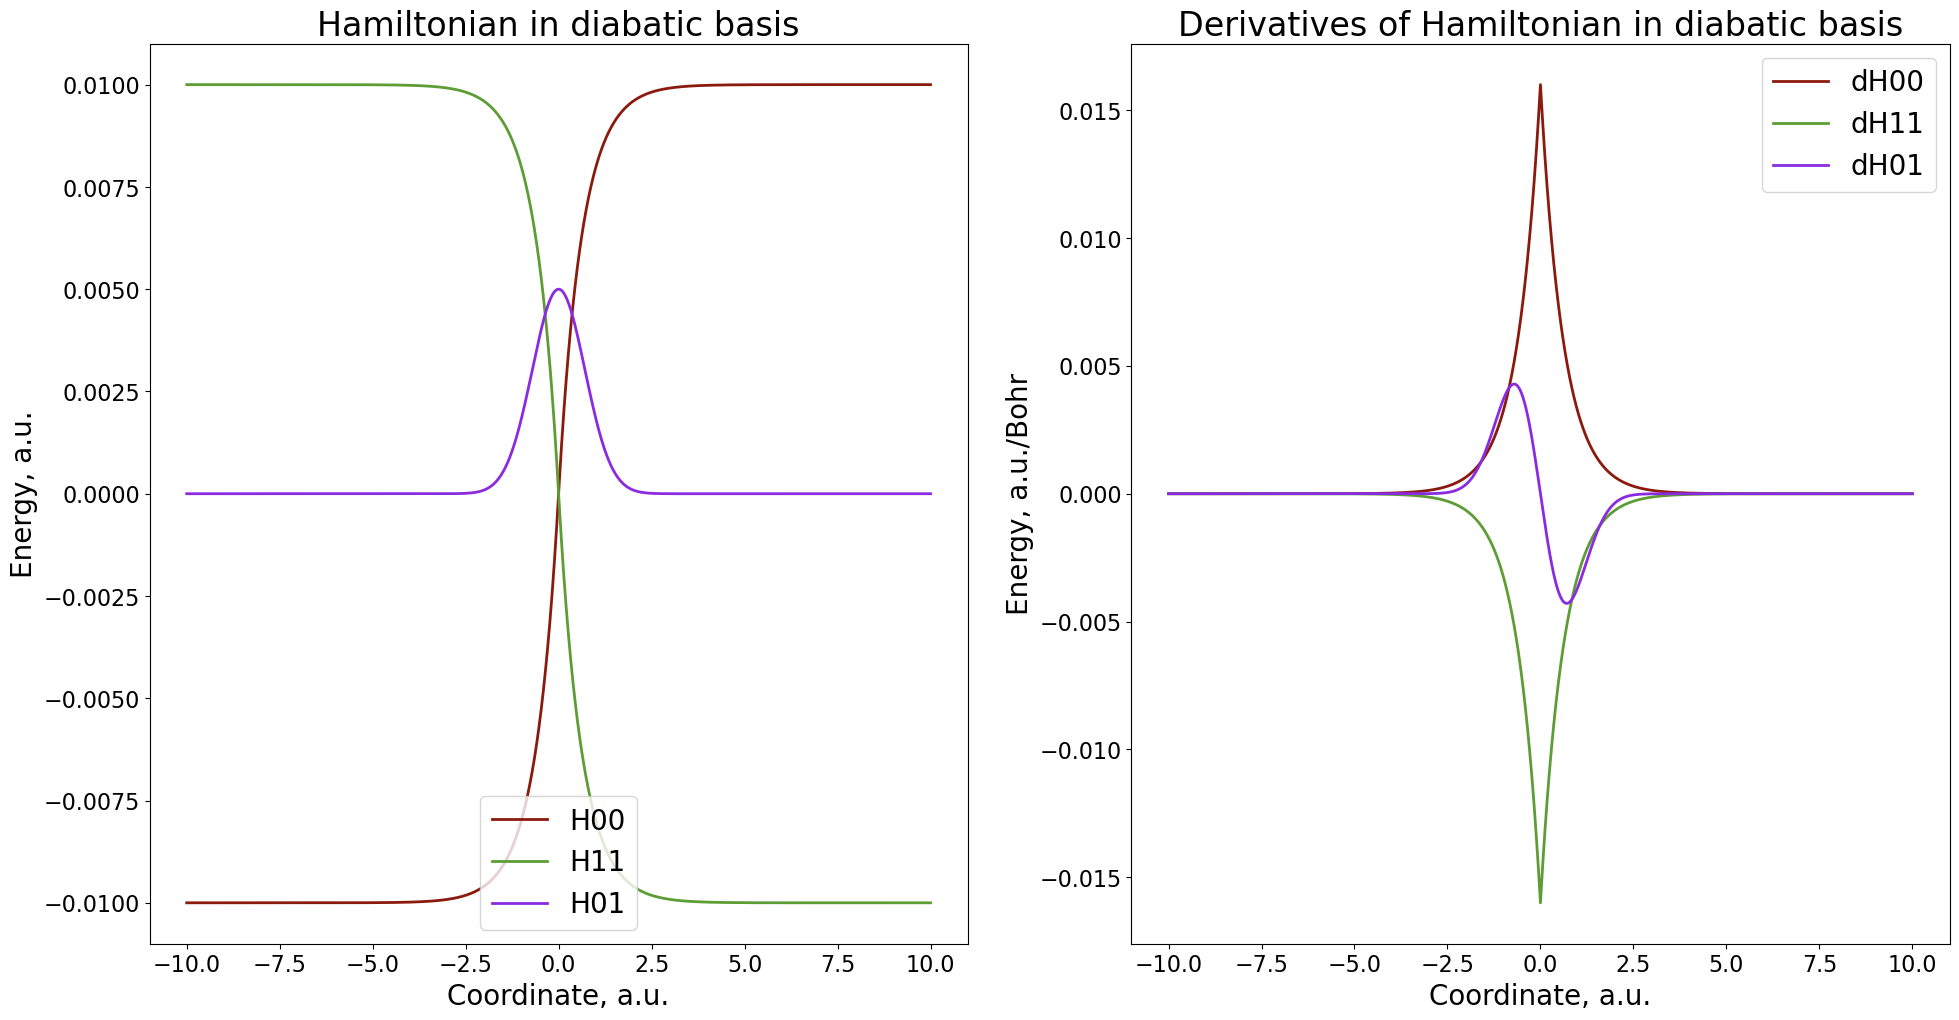

In [5]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 2. Tully Model II
<a name="2"></a>[Back to TOC](#TOC)

Define the range of x values

In [6]:
xmin = -20.0
xmax = 20.0
dx = 0.01

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in range(nsteps):
    X.append(xmin + i * dx)

Do the calculations
<a name="Tully2-1"></a>

In [7]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Tully.Tully2(q, {"A":0.10, "B":0.28, "C":0.015, "D":0.060, "E":0.050}, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)  

Plot the results

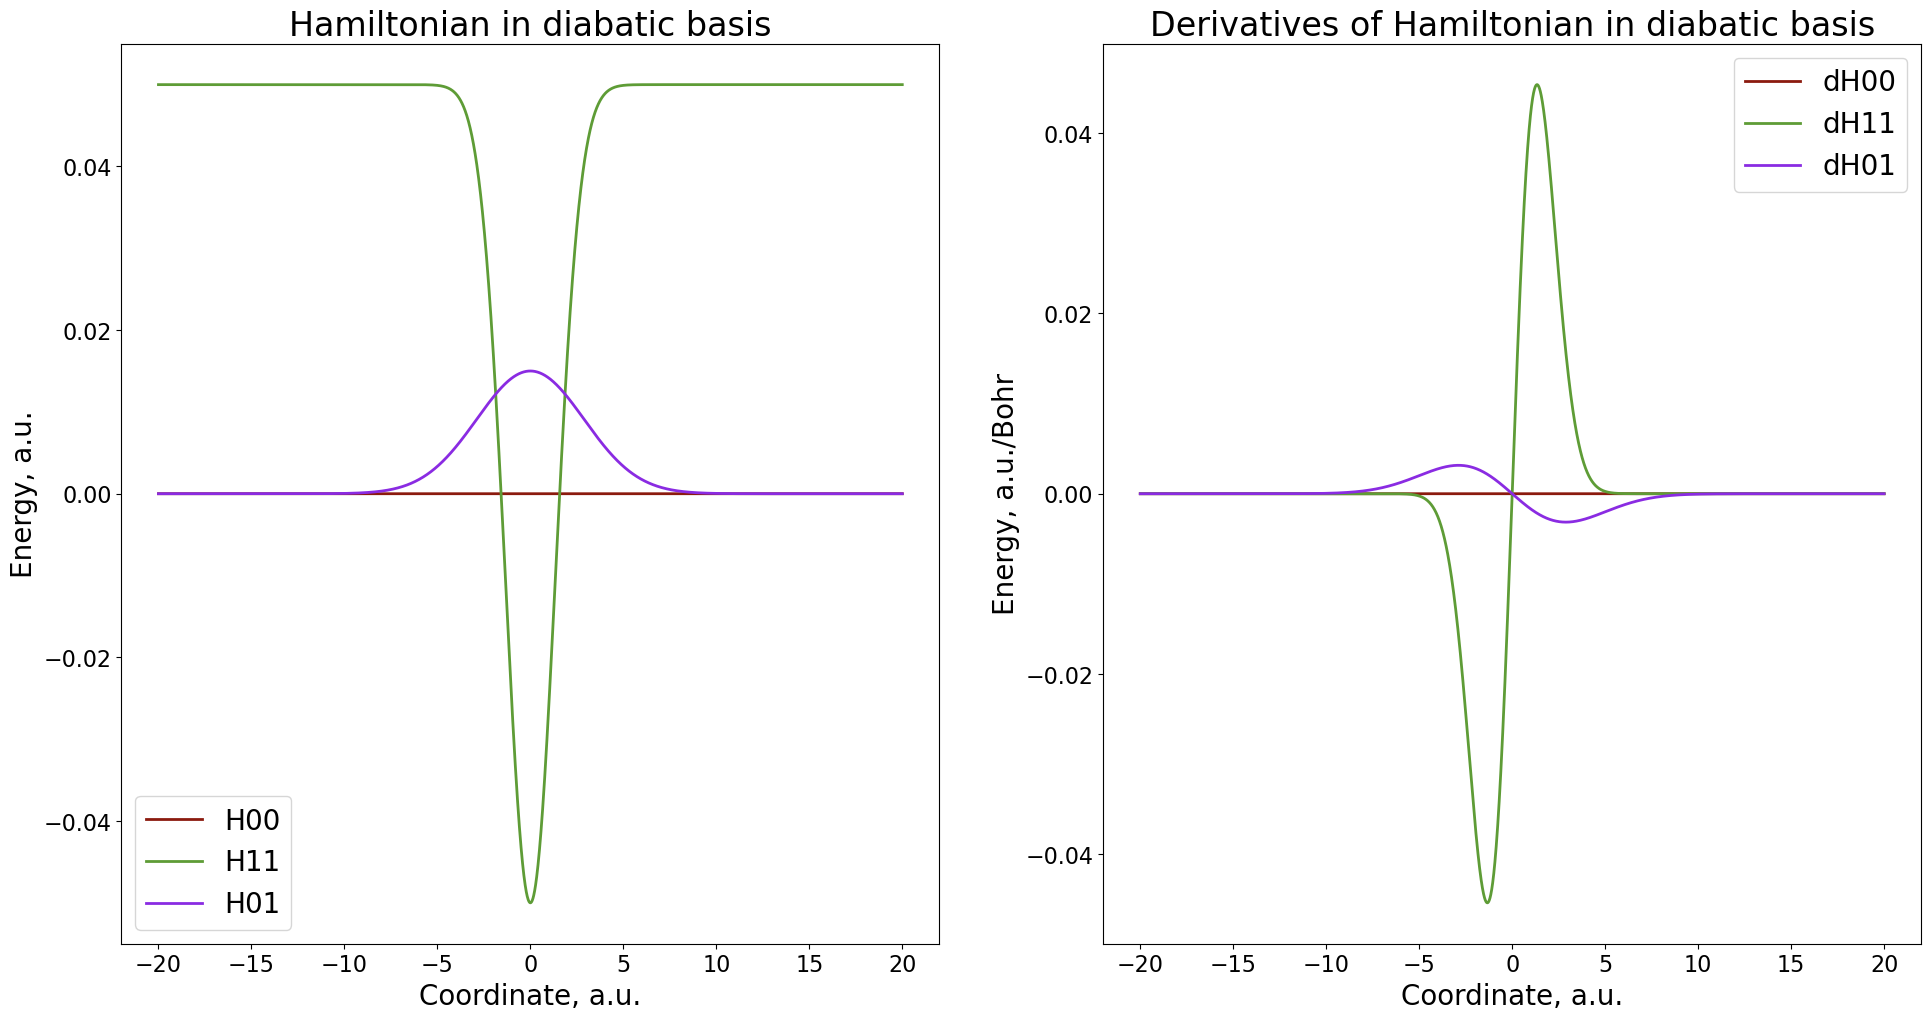

In [8]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 3. Tully Model III
<a name="3"></a>[Back to TOC](#TOC)

Define the range of x values

In [9]:
xmin = -20.0
xmax = 20.0
dx = 0.01

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in range(nsteps):
    X.append(xmin + i * dx)

<a name="Tully3-1"></a>

In [10]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Tully.Tully3(q, {"A":0.0006, "B":0.1000, "C":0.9000}, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)

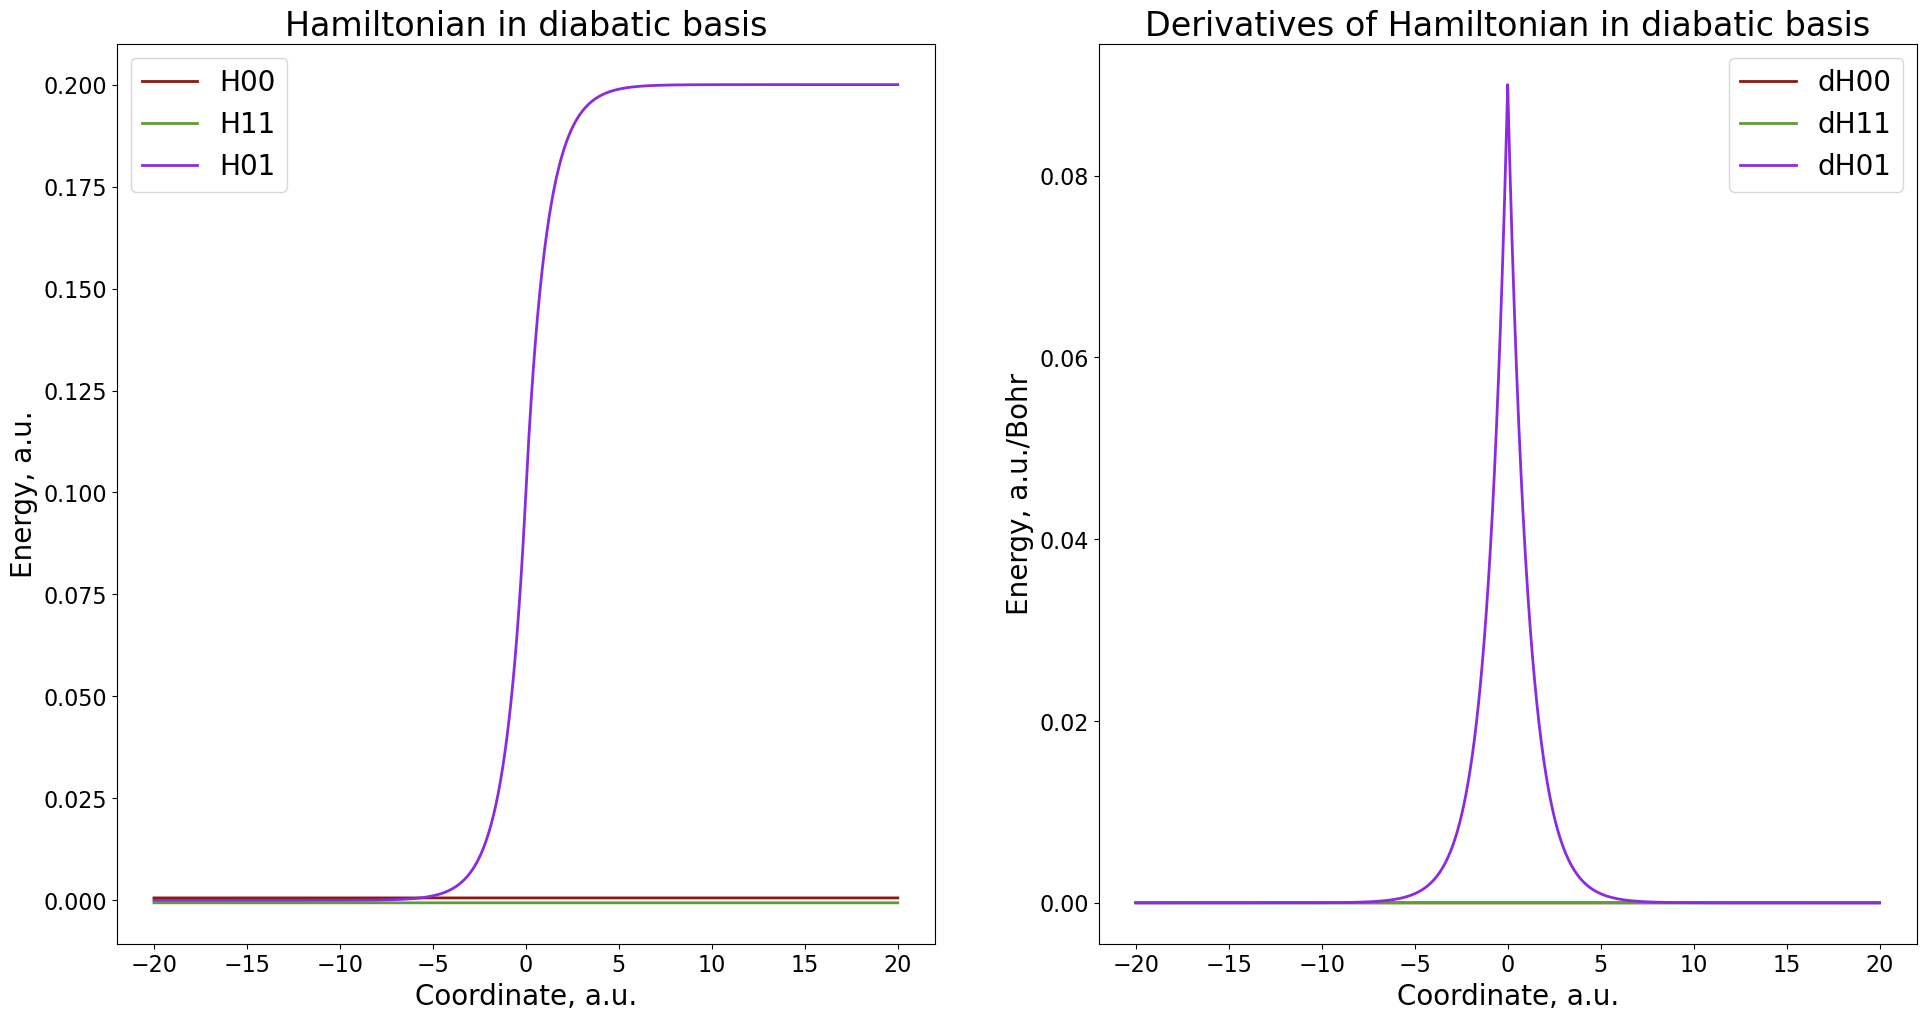

In [11]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 4. Shenvi - Subotnik - Yang (SSY)  model

<a name="4"></a>[Back to TOC](#TOC)

Define the range of x and y values

In [12]:
xmin, xmax, dx = -10.0, 10.0, 0.1
ymin, ymax, dy = -10.0, 10.0, 0.1

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in range(nsteps_x):
    X.append(xmin + i * dx)
    
for i in range(nsteps_y):
    Y.append(ymin + i * dy)

<a name="ssy-1"></a>

In [13]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps_x):
    h00, h11, h01 = [], [], []
    dh00, dh11, dh01 = [], [], []
    
    for j in range(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = SSY.SSY(q, {"E0":0.05, "A":0.15, "B":0.14, "C":0.015, "D":0.06} , full_id)
    
        h00.append(obj.ham_dia.get(0,0).real)
        h11.append(obj.ham_dia.get(1,1).real)
        h01.append(obj.ham_dia.get(0,1).real)    
    
        dh00.append(obj.d1ham_dia[0].get(0,0).real)
        dh11.append(obj.d1ham_dia[0].get(1,1).real)
        dh01.append(obj.d1ham_dia[0].get(0,1).real)

    H00.append(h00); H11.append(h11); H01.append(h01);
    dH00.append(dh00); dH11.append(dh11); dH01.append(dh01);

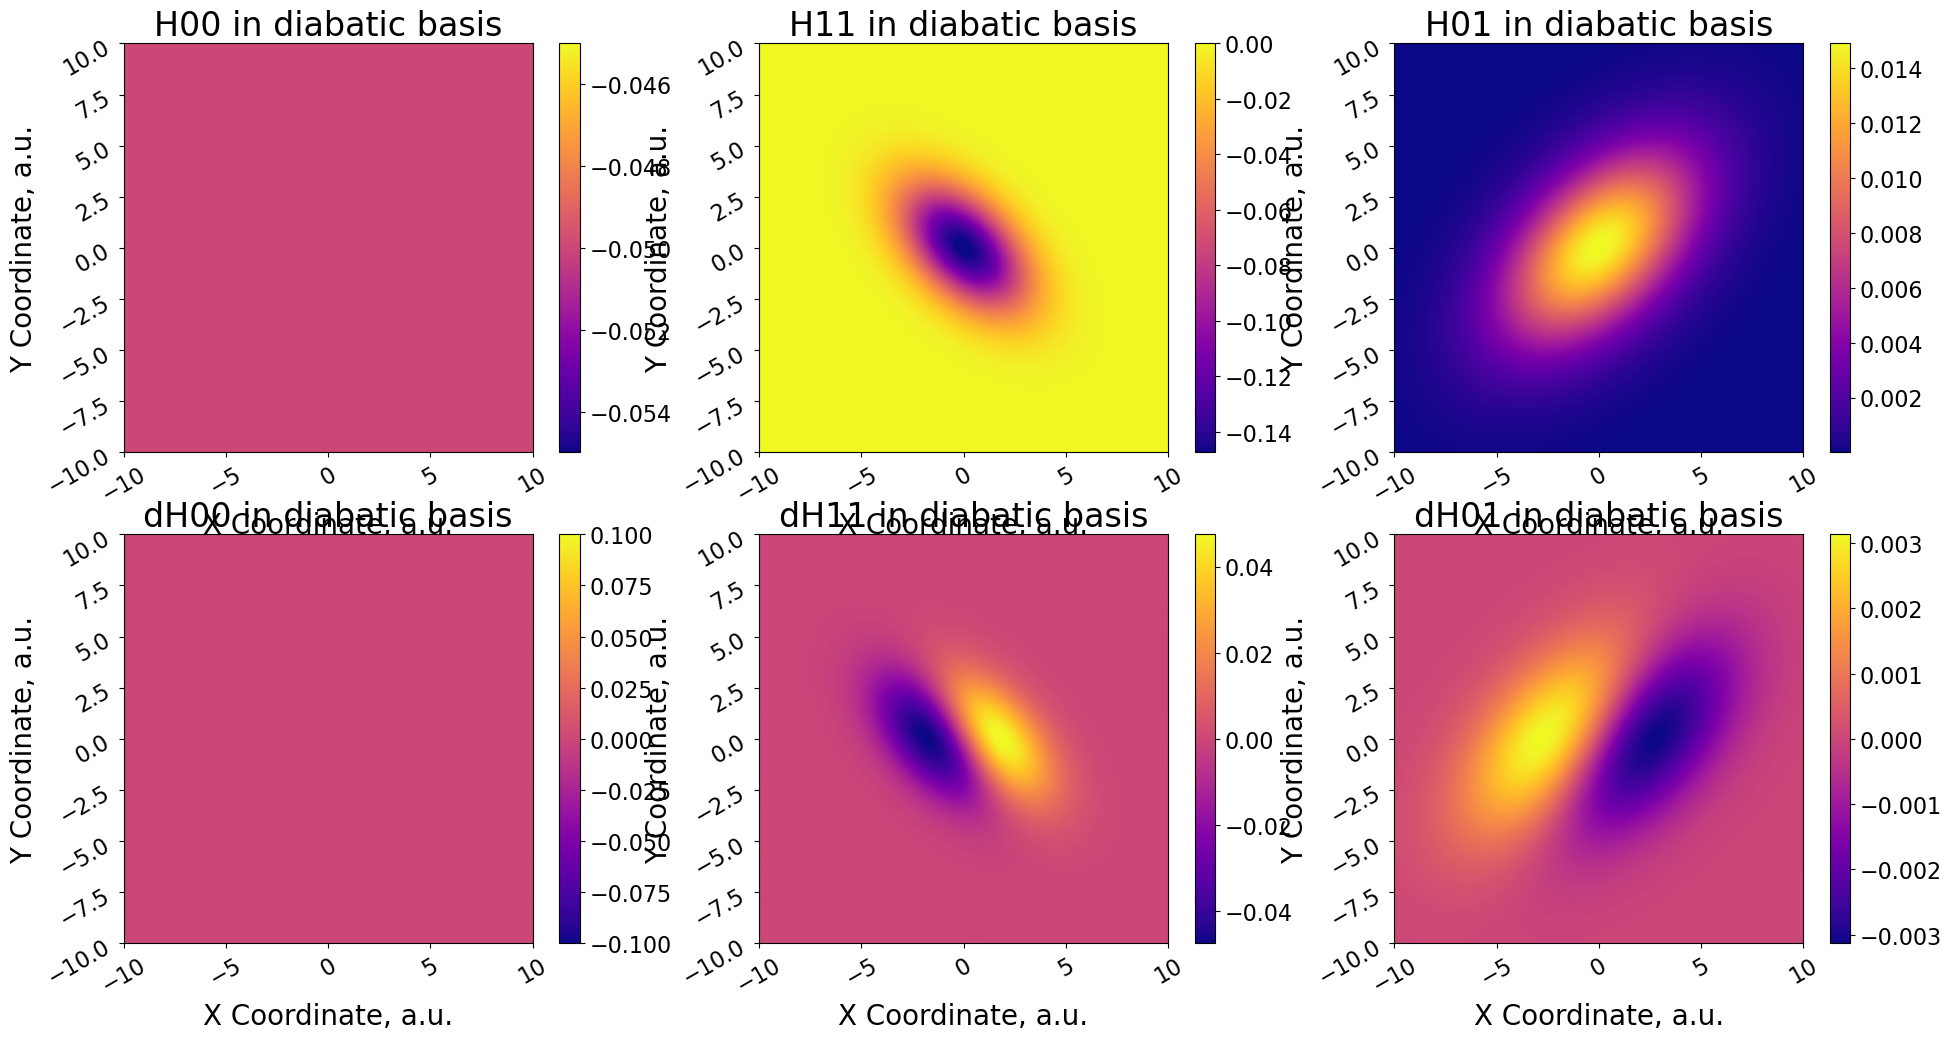

In [14]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(2,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(2,3,2)
plt.title('H11 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H11)

plt.subplot(2,3,3)
plt.title('H01 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H01)

plt.subplot(2,3,4)
plt.title('dH00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00)


plt.subplot(2,3,5)
plt.title('dH11 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH11)

plt.subplot(2,3,6)
plt.title('dH01 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH01)

plt.show()
plt.close()

## 5. Martens model I

<a name="5"></a>[Back to TOC](#TOC)

Define the range of x and y values

In [15]:
xmin, xmax, dx = -5.0, 5.0, 0.1
ymin, ymax, dy = -1.5, 1.5, 0.1

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in range(nsteps_x):
    X.append(xmin + i * dx)
    
for i in range(nsteps_y):
    Y.append(ymin + i * dy)

<a name="Martens1-1"></a>

In [16]:
H00, dH00_0, dH00_1 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps_x):
    h00, dh00_0, dh00_1 = [], [], []
    
    
    for j in range(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = Martens.model1(q, {"Va":0.00625, "Vb":0.0106}, full_id)
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)
        
    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);

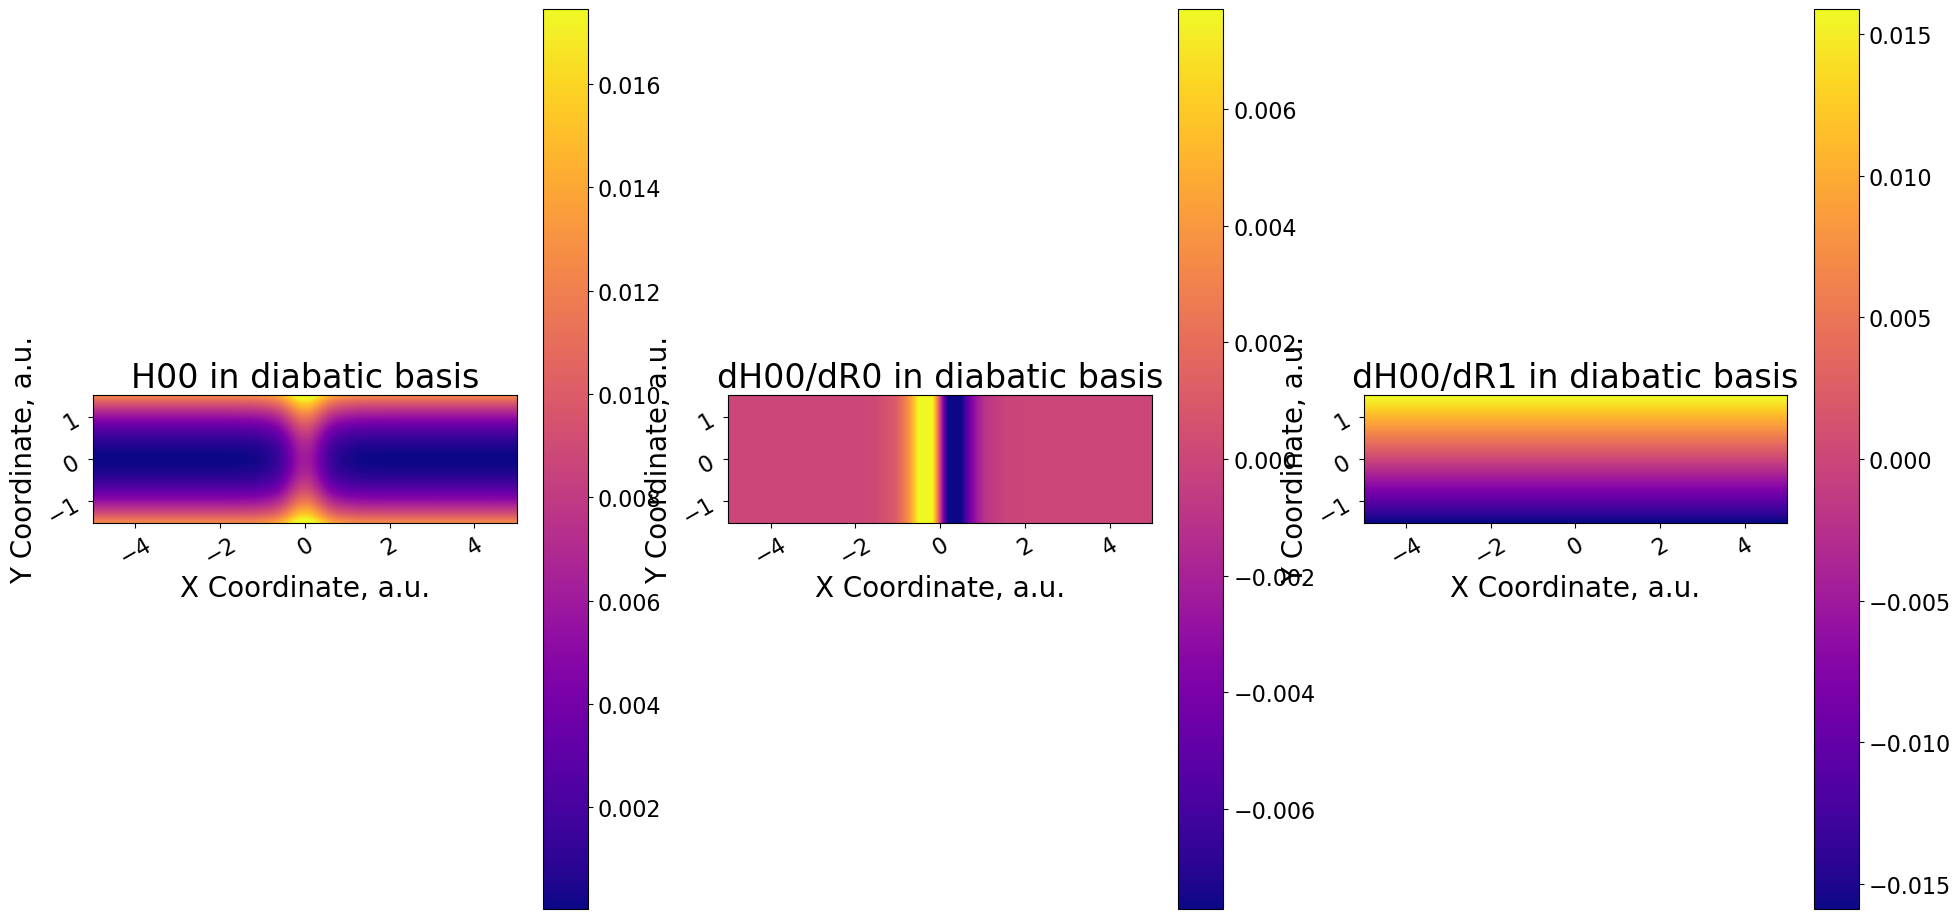

In [17]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(1,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(1,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(1,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.show()
plt.close()

## 6. Martens model II

<a name="6"></a>[Back to TOC](#TOC)

Define the range of x and y values

In [18]:
xmin, xmax, dx = -2.5, 2.5, 0.1
ymin, ymax, dy = -1.5, 1.5, 0.1

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in range(nsteps_x):
    X.append(xmin + i * dx)
    
for i in range(nsteps_y):
    Y.append(ymin + i * dy)

<a name="Martens2-1"></a>

In [19]:
H00, dH00_0, dH00_1 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps_x):
    h00, dh00_0, dh00_1 = [], [], []    
    
    for j in range(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = Martens.model2(q, {"Va":0.00625, "Vb":0.0106, "Vc":0.4}, full_id)
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)
        
    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);

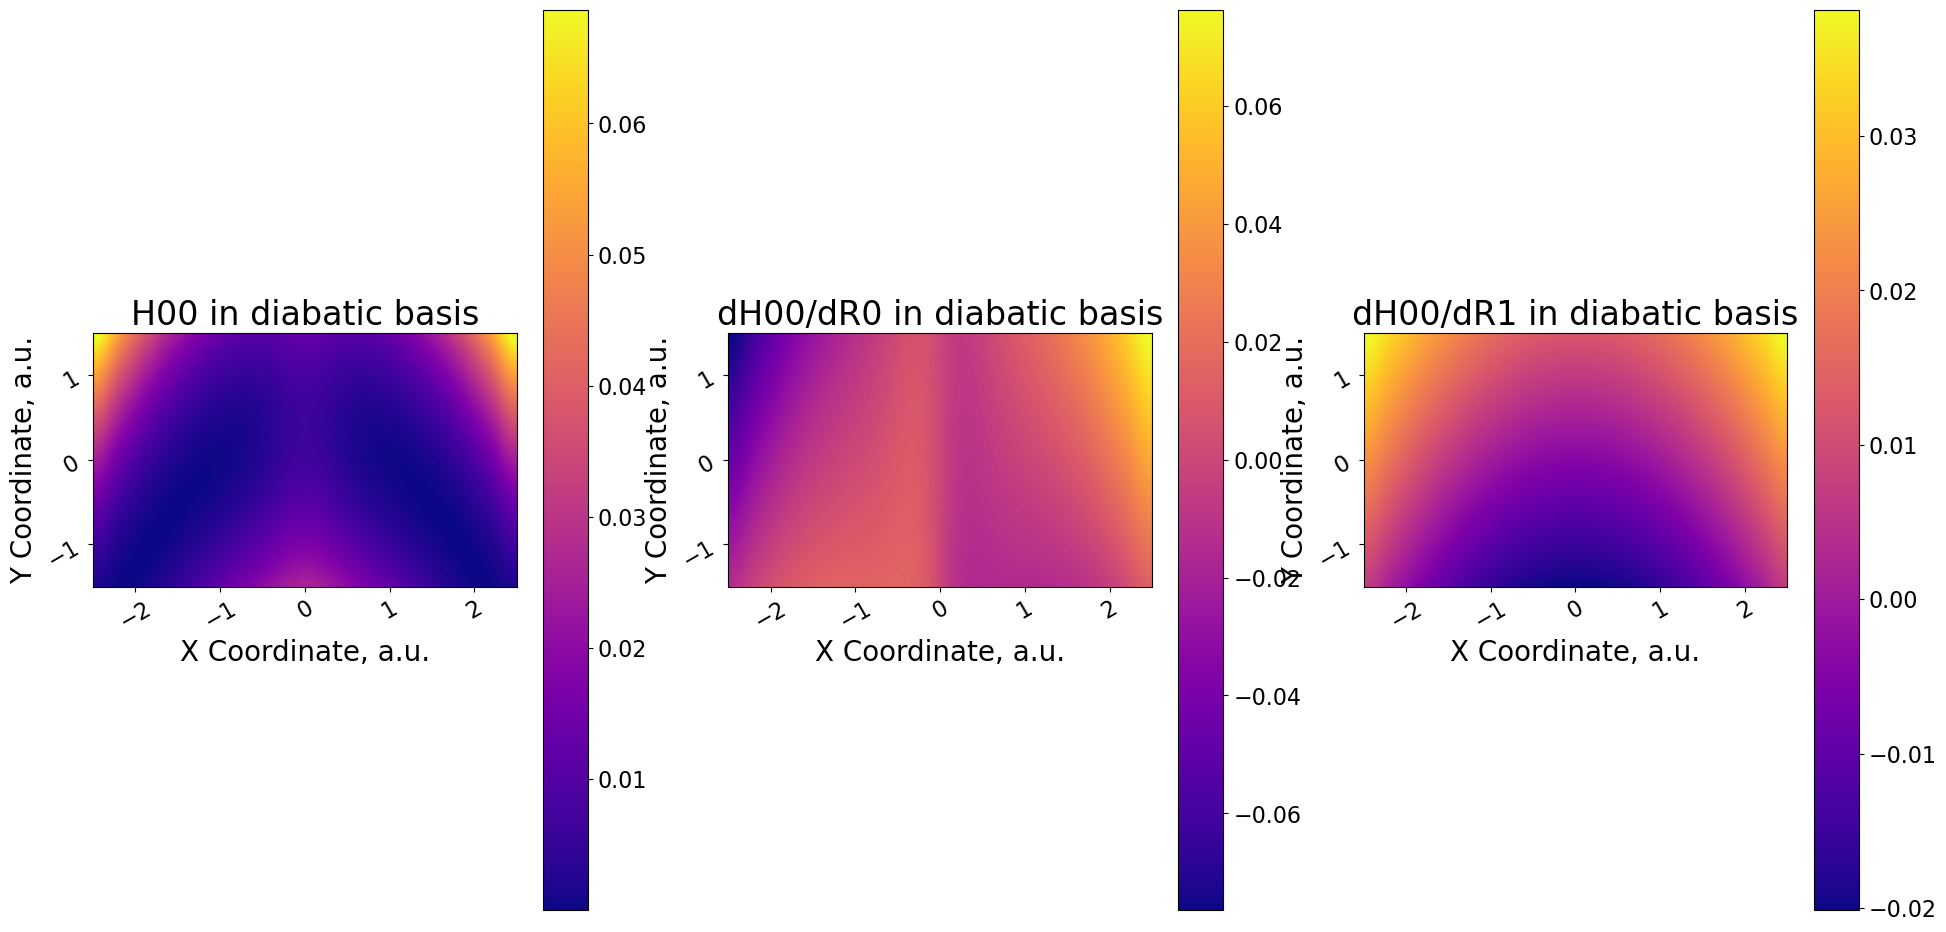

In [20]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(1,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(1,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(1,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.show()
plt.close()

## 7. Linear Vibronic Coupling (LVC), set 1

<a name="7"></a>[Back to TOC](#TOC)

Define the range of x values

In [21]:
xmin, xmax, dx = -20.0, 20.0, 0.1

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in range(nsteps):
    X.append(xmin + i * dx)

In [22]:
params = LVC.get_LVC_set1()
ndof = len(params["omega"])
rnd = Random()

q = MATRIX(ndof,1); 
params["mass"] = []
for i in range(0, ndof):
    params["mass"].append(2000.0)
    q.set(i, 0, rnd.uniform(-0.1, 1.1))    

H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps):        
    q.set(0, 0, X[i])    
    
    obj = LVC.LVC(q, params, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)    

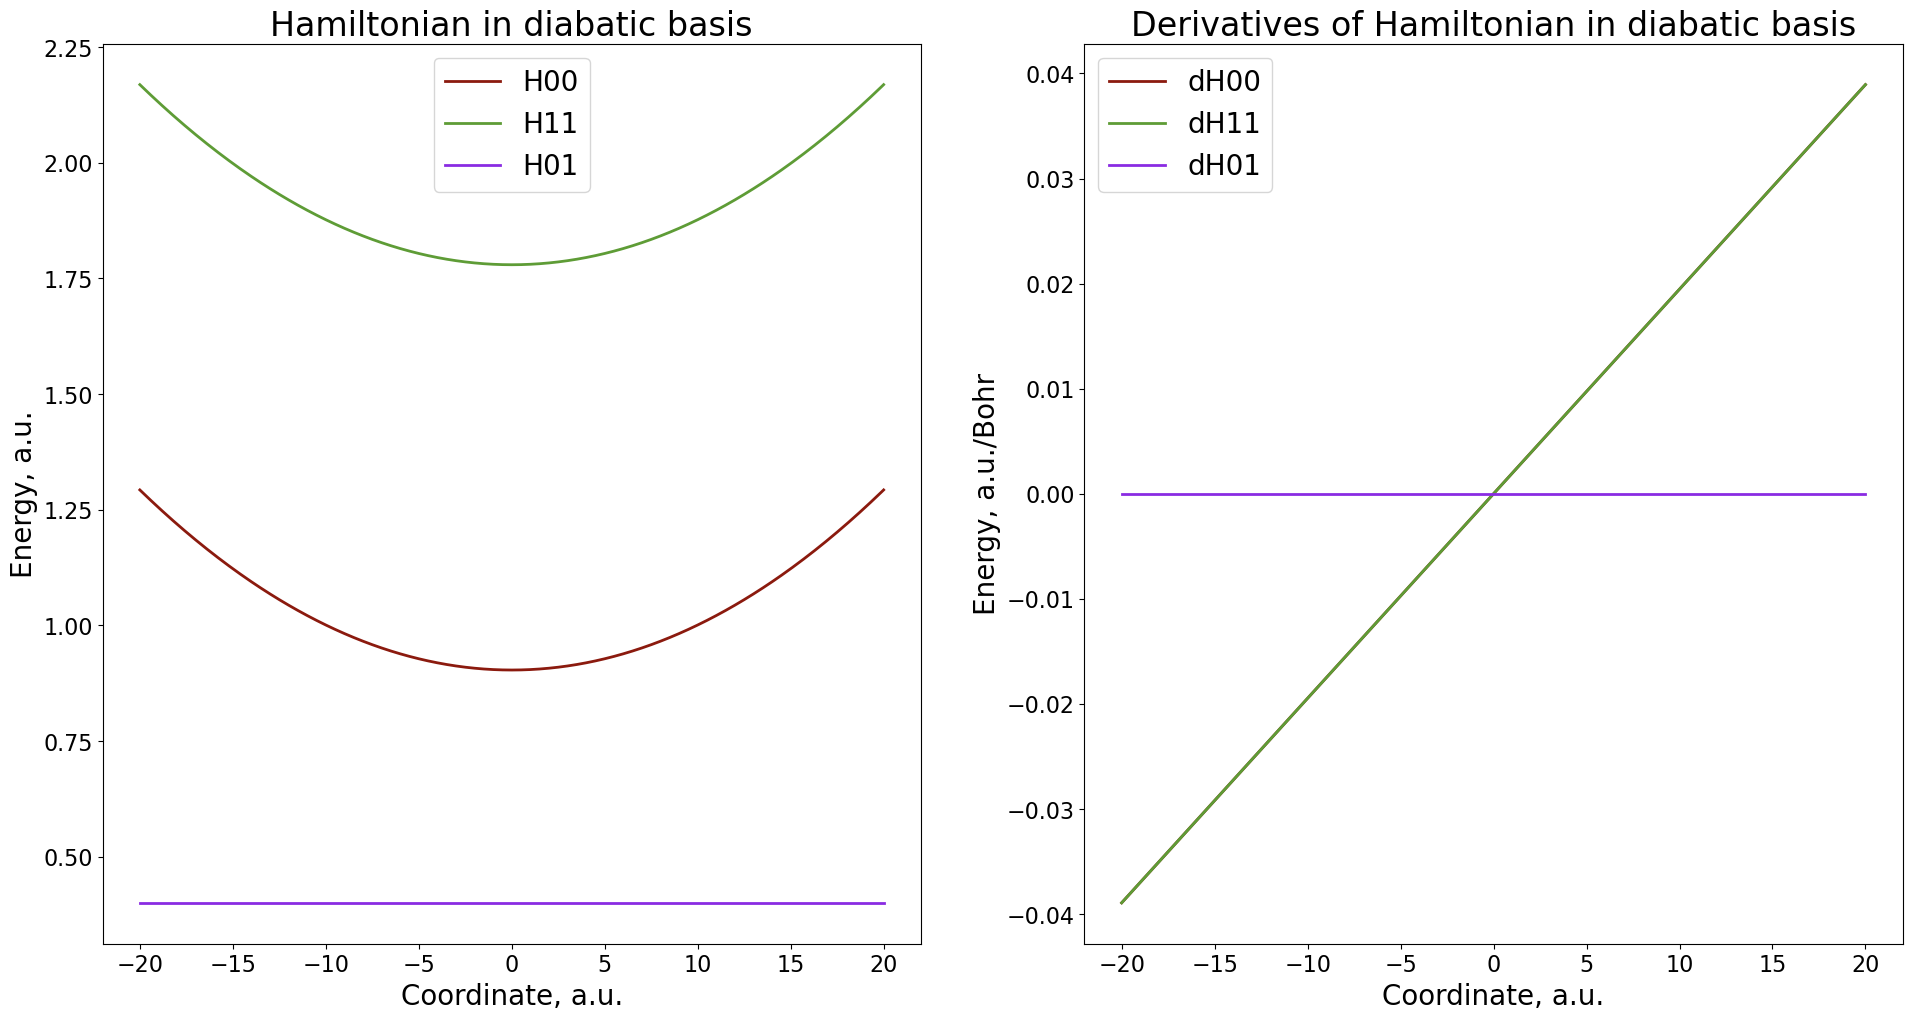

In [23]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 8. Henon-Heiles

<a name="8"></a>[Back to TOC](#TOC)

Define the ranges of x and y values

In [24]:
xmin, xmax, dx = -20.5, 20.5, 0.2
ymin, ymax, dy = -15.5, 15.5, 0.2

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in range(nsteps_x):
    X.append(xmin + i * dx)
    
for i in range(nsteps_y):
    Y.append(ymin + i * dy)

In [25]:
H00, dH00_0, dH00_1 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(nsteps_x):
    h00, dh00_0, dh00_1 = [], [], []
    
    
    for j in range(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = Henon_Heiles.Henon_Heiles(q, {"lam":0.2}, full_id)
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)
        
    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);

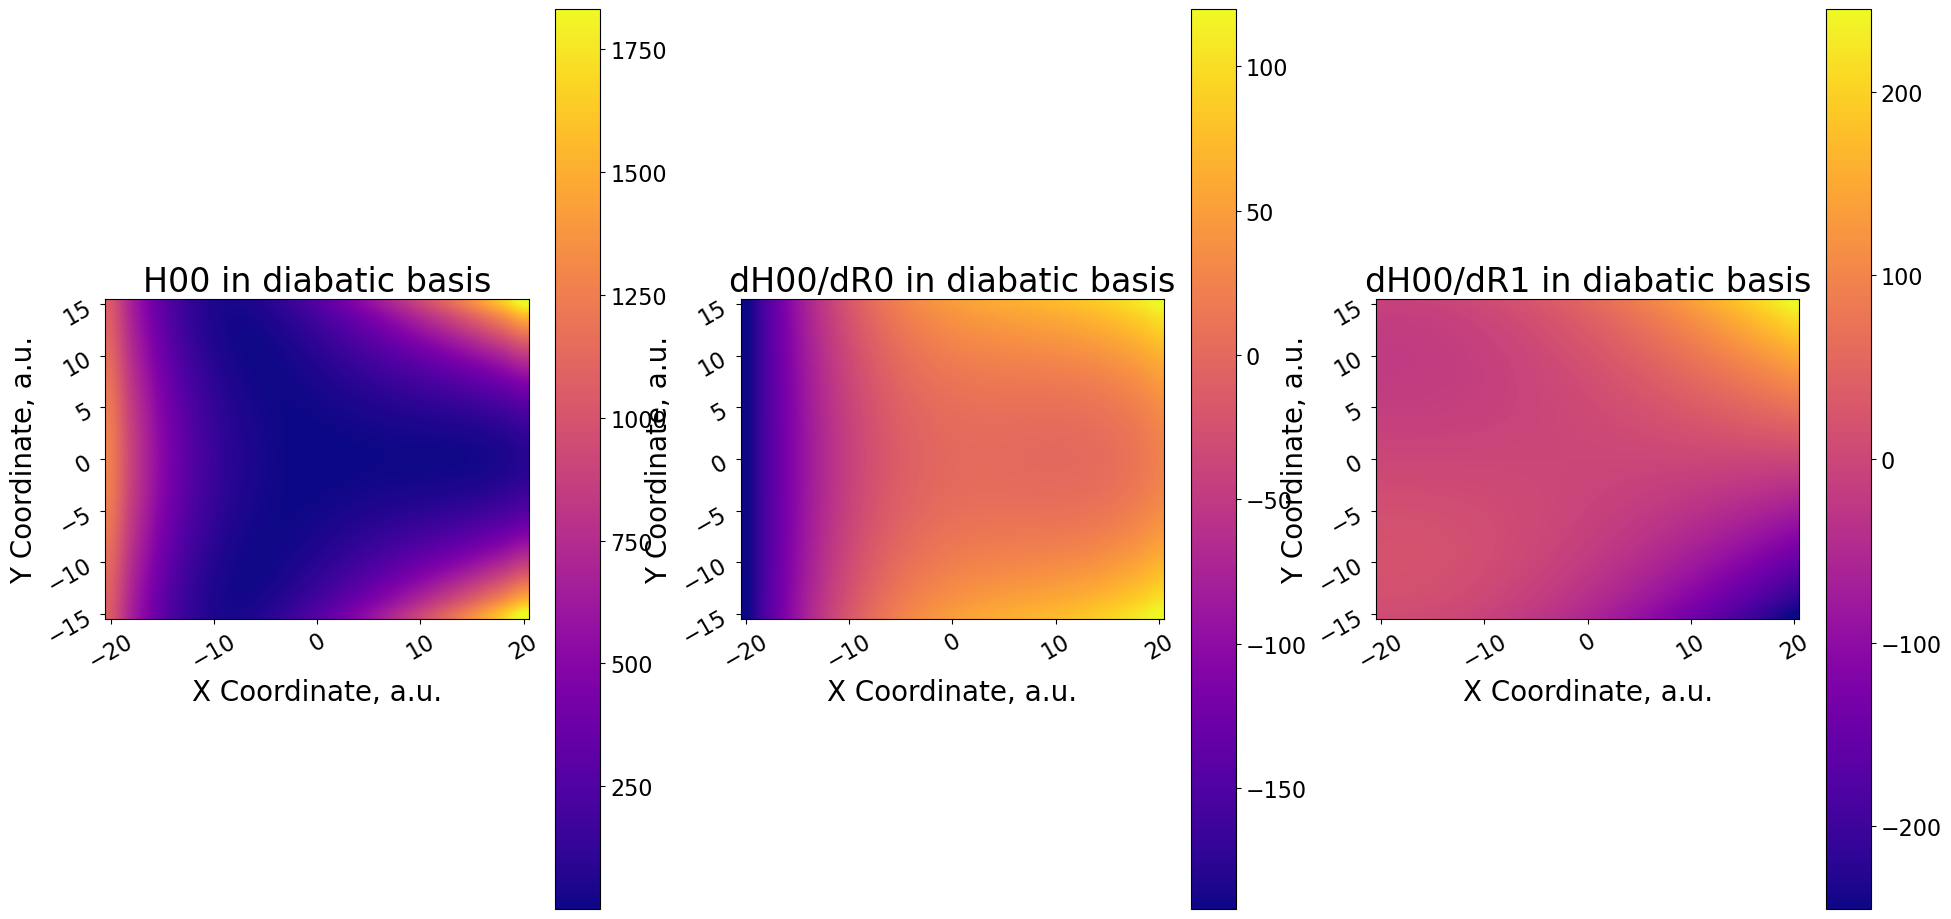

In [26]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(1,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(1,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(1,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.show()
plt.close()

## 9. Faist-Levine, LiI

<a name="9"></a>[Back to TOC](#TOC)

Define the range of x values, run the calculations, and plot the results

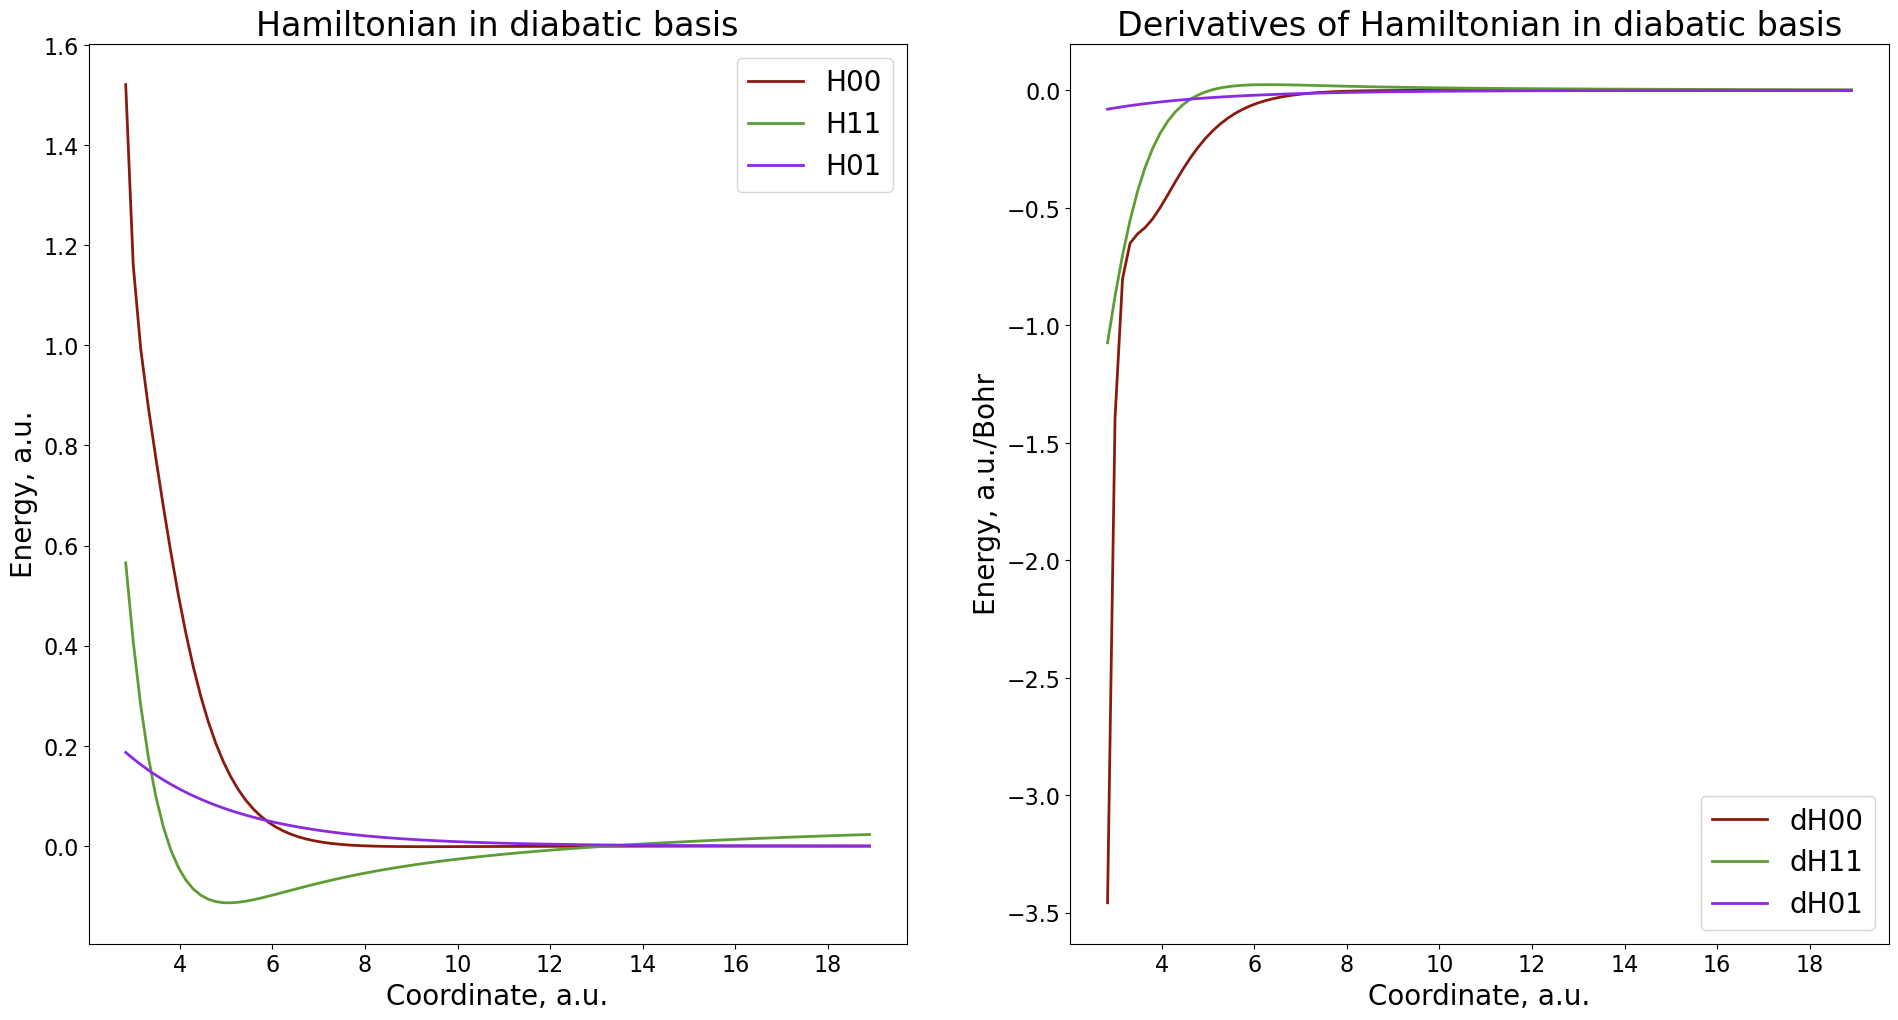

In [7]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])
params = Faist_Levine.get_Faist_Levine_NaI()

X = list(np.linspace(1.5*units.Angst, 10.0*units.Angst, 100) ) 
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = obj = Faist_Levine.Faist_Levine(q, params, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01)    

## 10. Subotnik, dumbbell geometry

<a name="10"></a>[Back to TOC](#TOC)

Define the range of x values, run the calculations, and plot the results
<a name="dumb-1"></a>

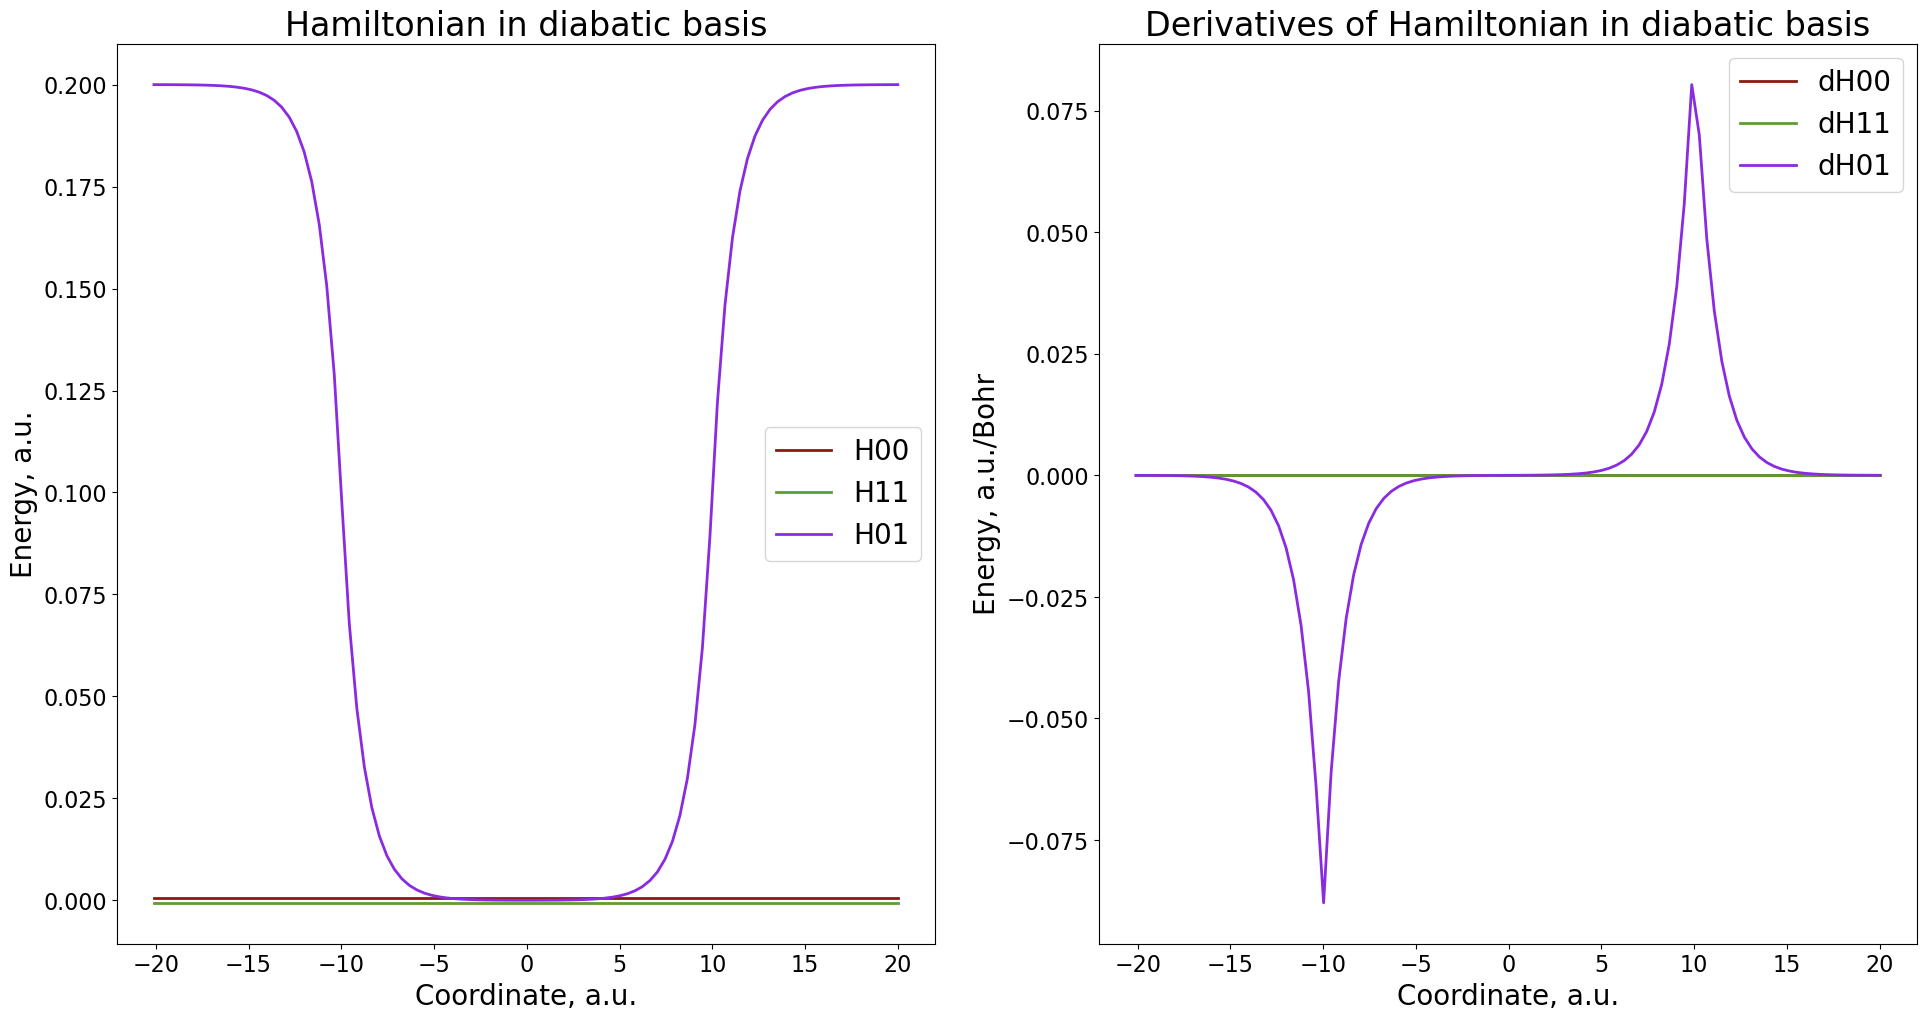

In [22]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

X = list(np.linspace(-20.1, 20.0, 100) )
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Subotnik.dumbbell_geometry(q, {"A":0.0006, "B":0.1, "C":0.9, "Z":10.000 }, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01)    

## 11. Subotnik, double arch geometry

<a name="11"></a>[Back to TOC](#TOC)

Define the range of x values, run the calculations, and plot the results
<a name="darch-1"></a>

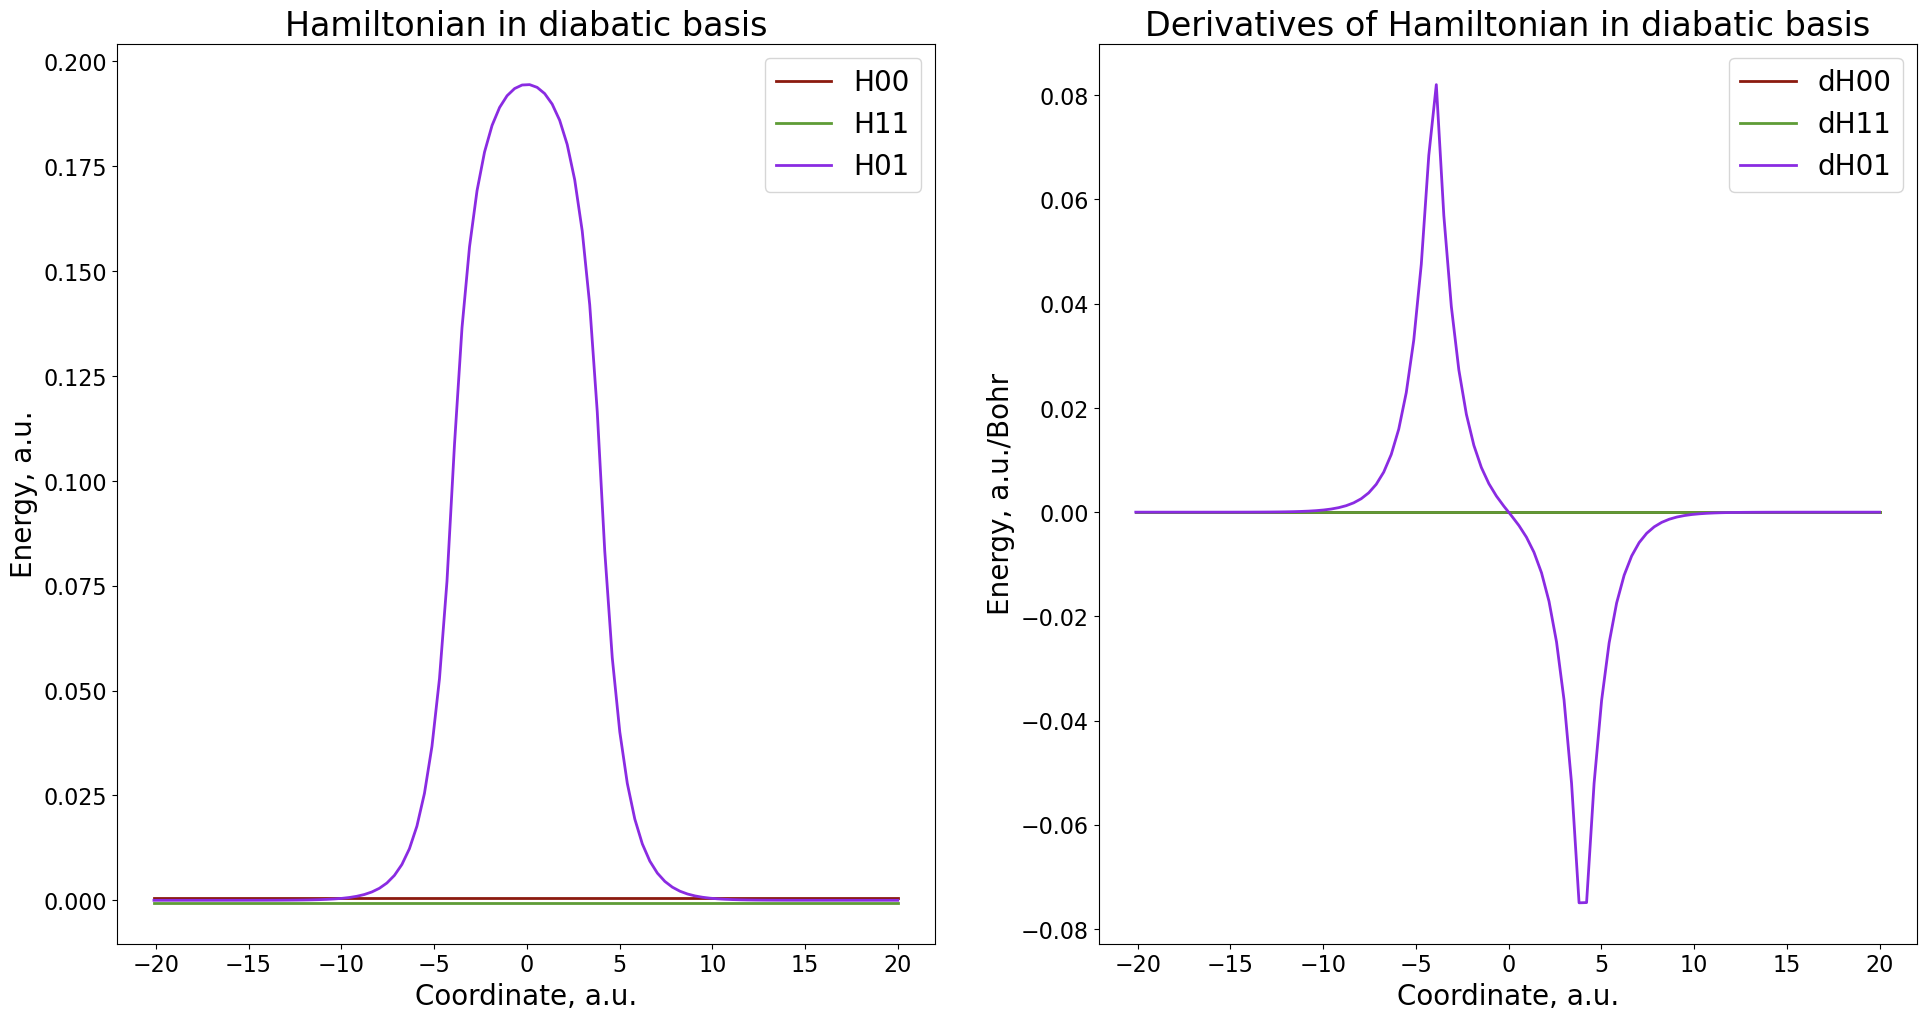

In [23]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

X = list(np.linspace(-20.1, 20.0, 100) )
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Subotnik.double_arch_geometry(q, {"A":0.0006, "B":0.1, "C":0.9, "Z":4.000 }, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01) 

## 12. Dual Rosen-Zener-Demkov

<a name="12"></a>[Back to TOC](#TOC)

Define the range of x values, run the calculations, and plot the results
<a name="rzd-1"></a>

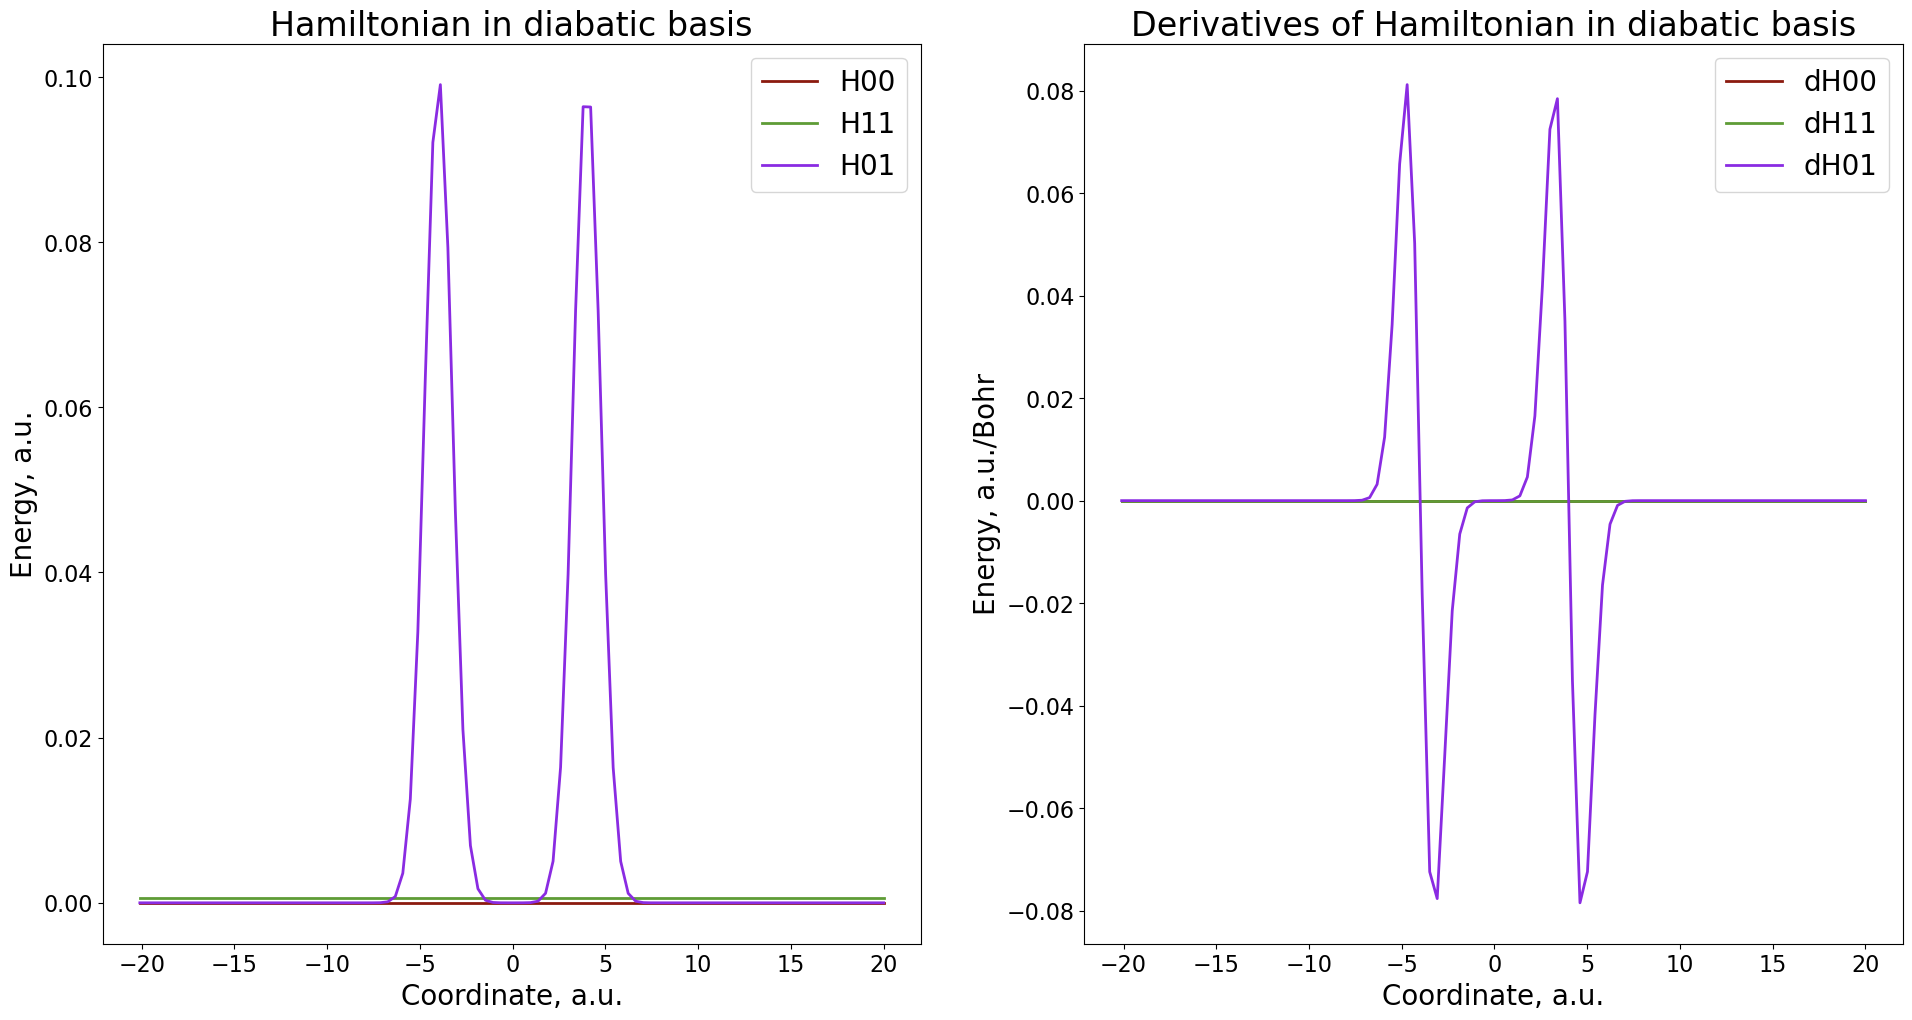

In [4]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

X = list(np.linspace(-20.1, 20.0, 100) )
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Zhu.dual_RZD(q, {"A":0.0006, "B":0.1, "C":0.9, "Z":4.000 }, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01) 

## 13. Dual Landau-Zener-Stuckelberg

<a name="13"></a>[Back to TOC](#TOC)

Define the range of x values, run the calculations, and plot the results
<a name="lzs-1"></a>

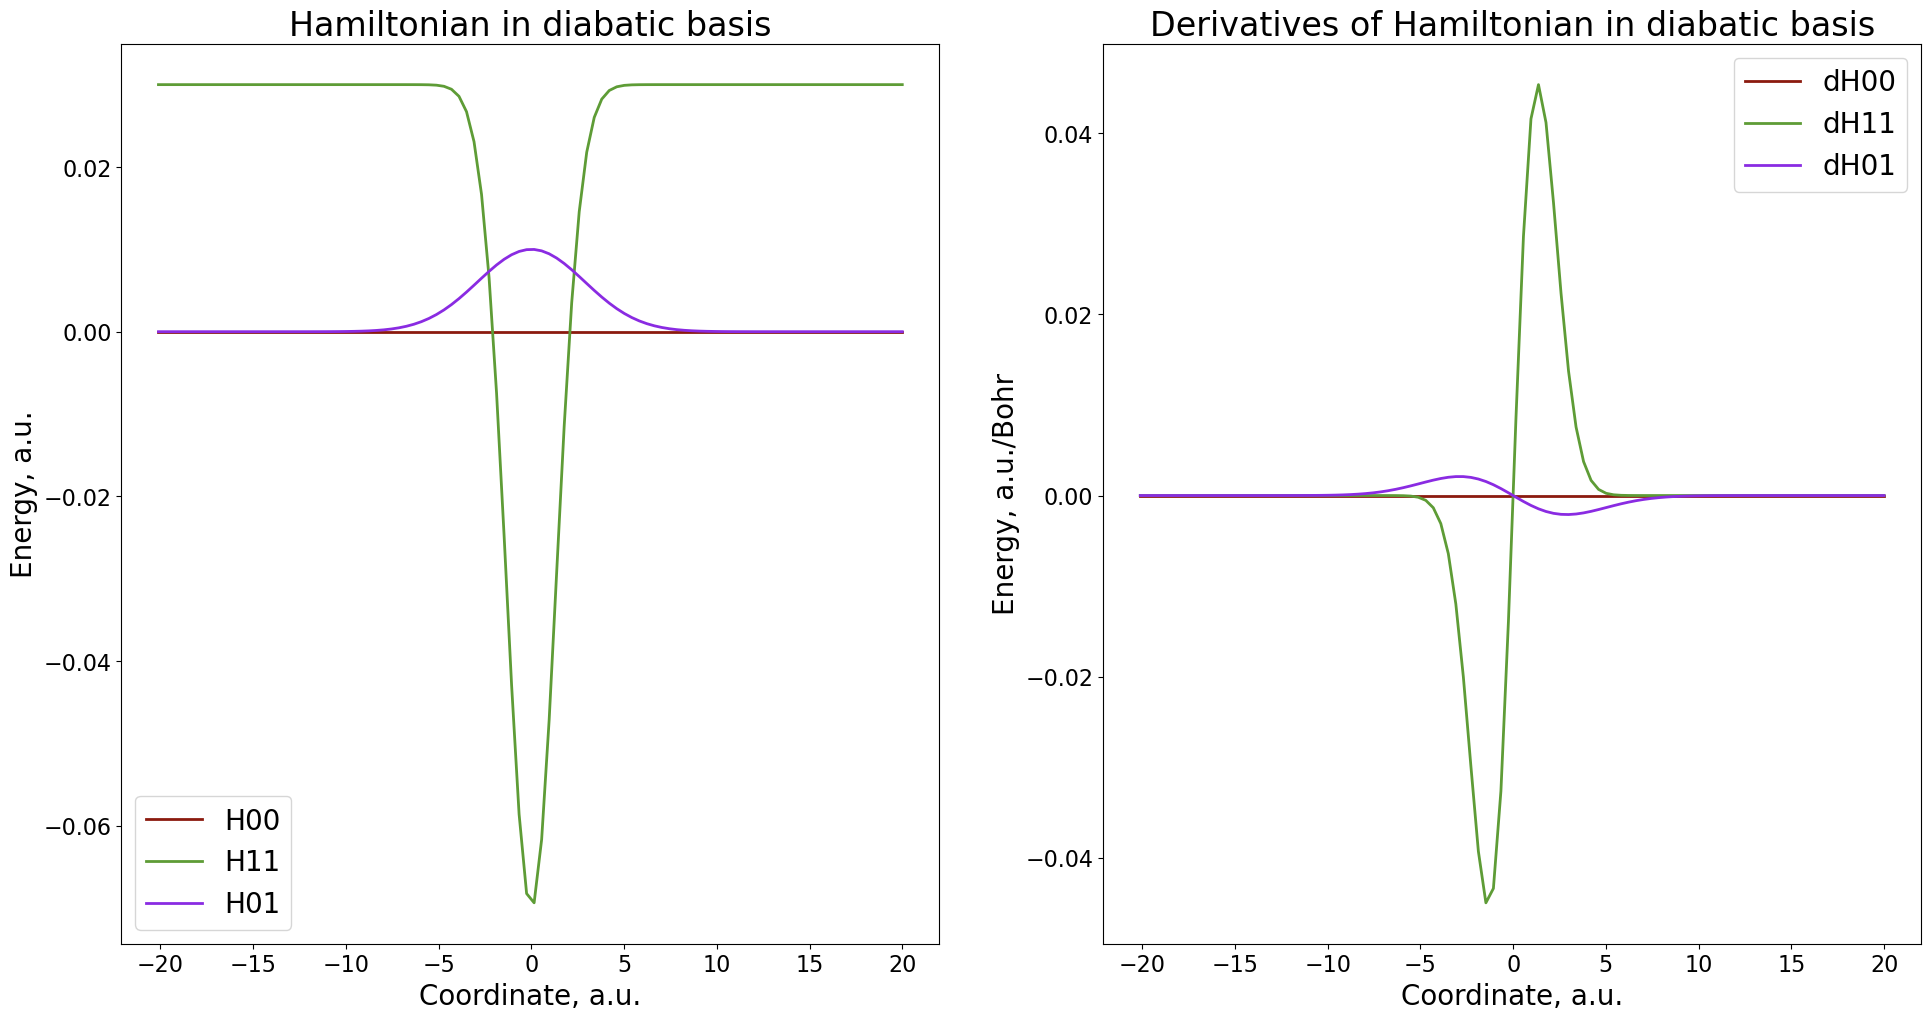

In [5]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

X = list(np.linspace(-20.1, 20.0, 100) )
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Zhu.dual_LZS(q, {"A":0.1, "B":0.28, "C":0.01, "D":0.06, "E0":0.03 }, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01) 

## 14. Renner-Teller

<a name="14"></a>[Back to TOC](#TOC)

Define the range of x values, run the calculations, and plot the results
<a name="rt-1"></a>

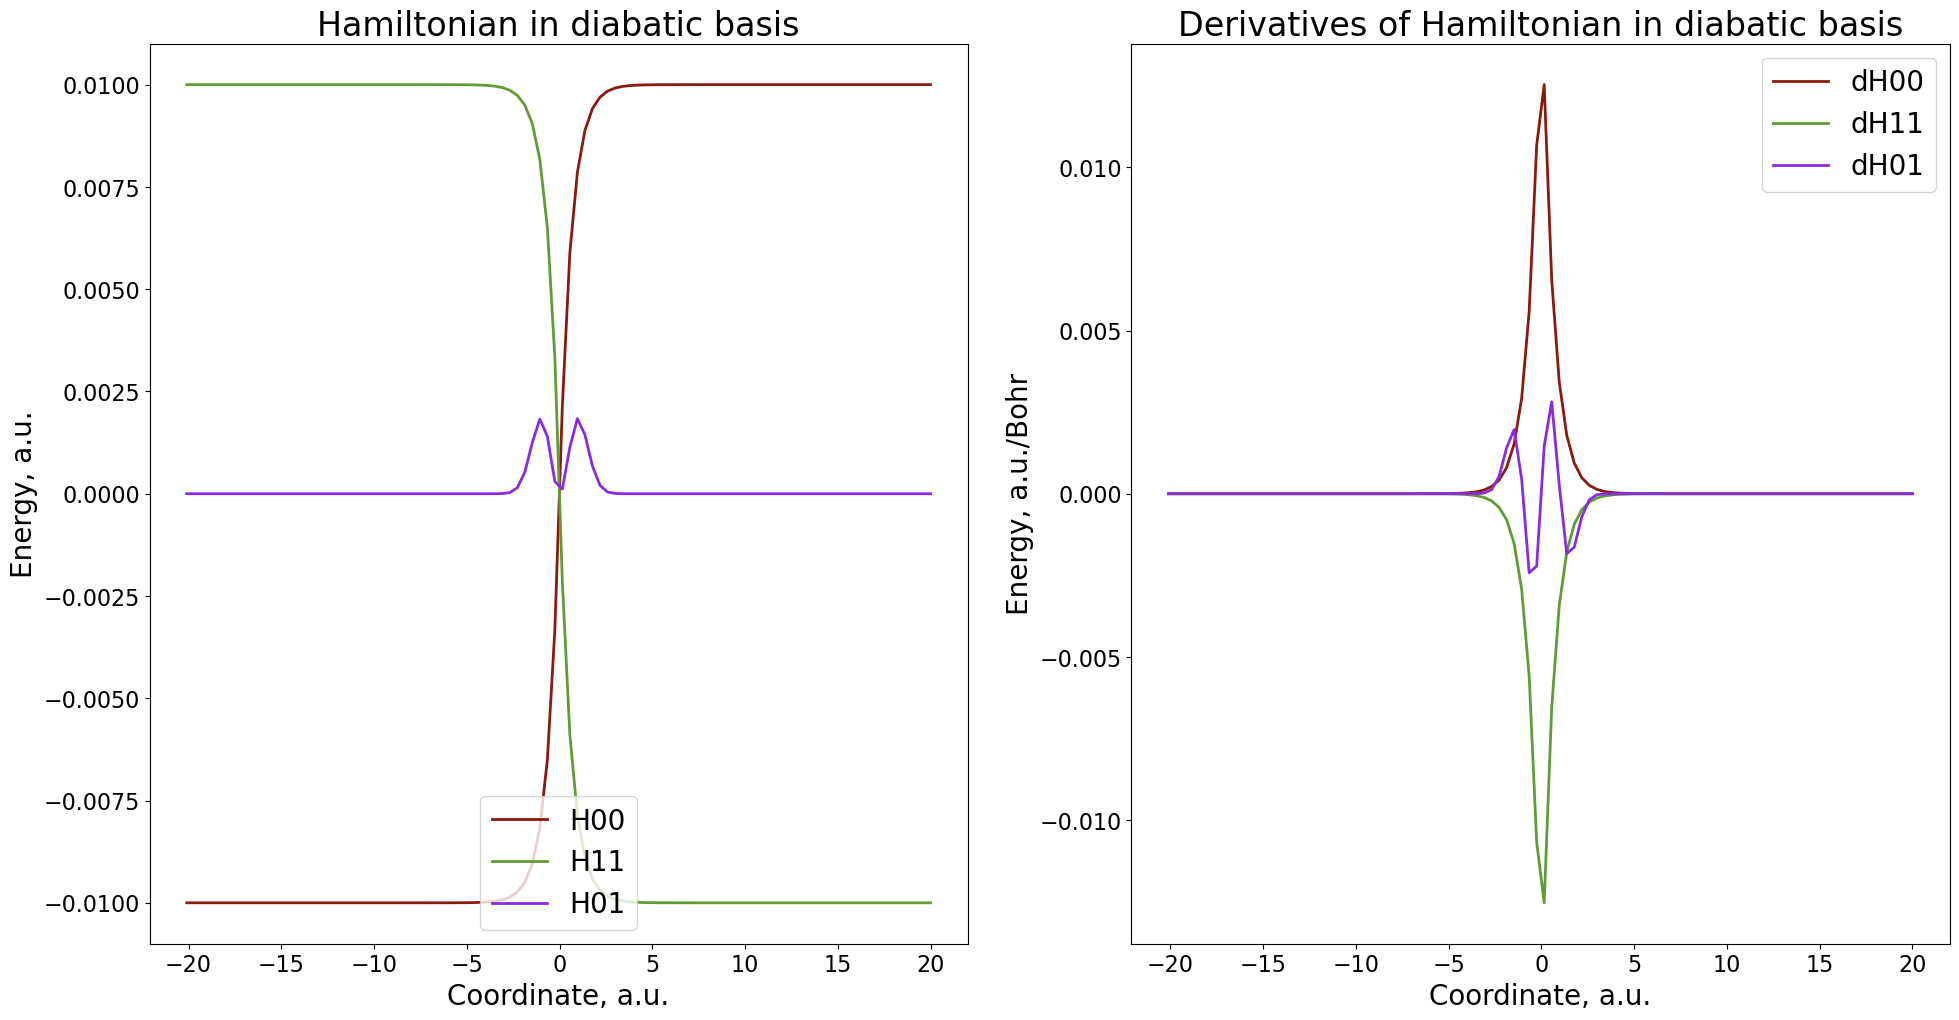

In [6]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

X = list(np.linspace(-20.1, 20.0, 100) )
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Zhu.Renner_Teller(q, {"A":0.010, "B":1.600, "C":0.005, "D":1.000 }, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01) 

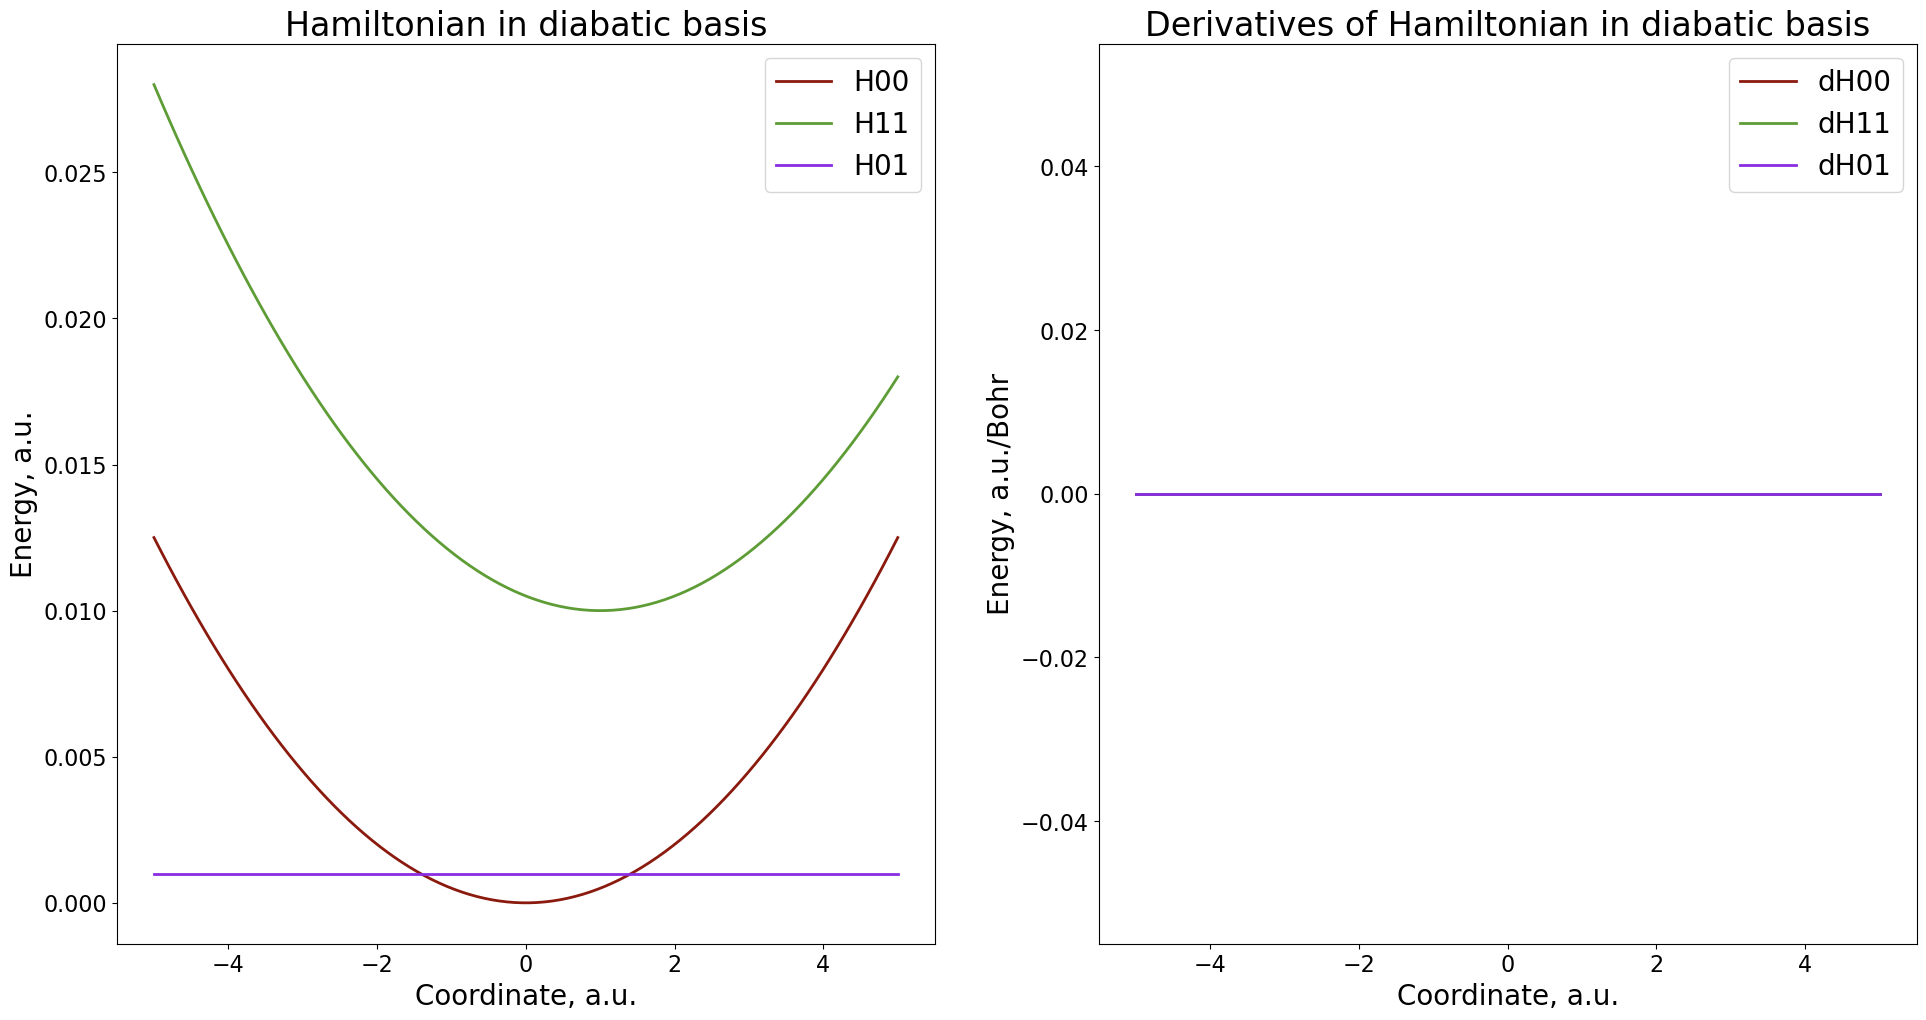

In [6]:
prms = {}

k0, k1 = 0.001, 0.001  # force constants of each diabatic surface
V = 0.001              # diabatic coupling
E0, E1 = 0.0, 0.01     # diabatic shifts
alp0, alp1 = 0.0, 0.0
x0, x1, x01 = 0.0, 1.0, 0.5
prms["A"] = [  [k0],   [0.0],
               [0.0],  [k1]
            ]
prms["B"] = [  [0.0],   [0.0],
                [0.0],   [0.0]
            ]
prms["C"] = [  [E0],   [V],
               [V],    [E1]
            ]
prms["T"] = [  [x0],   [x01],
               [x01],   [x1]
            ]

prms["a"] = [  [2.0*alp0],   [0.0],
               [0.0],  [2.0*alp1]
            ]
prms["b"] = [  [0.0],   [0.0],
               [0.0],   [0.0]
            ]
prms["c"] = [  [0.0],   [0.0],
               [0.0],    [0.0]
            ]
prms["t"] = [  [x0],   [x01],
               [x01],   [x1]
            ]


H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
full_id = Py2Cpp_int([0, 0])

X = list(np.linspace(-5, 5.0, 100) )
for i in range( len(X) ):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = Holstein.Holstein_gen(q, prms, full_id)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)
    
plot_1D(X, H00, H11, H01, dH00, dH11, dH01) 

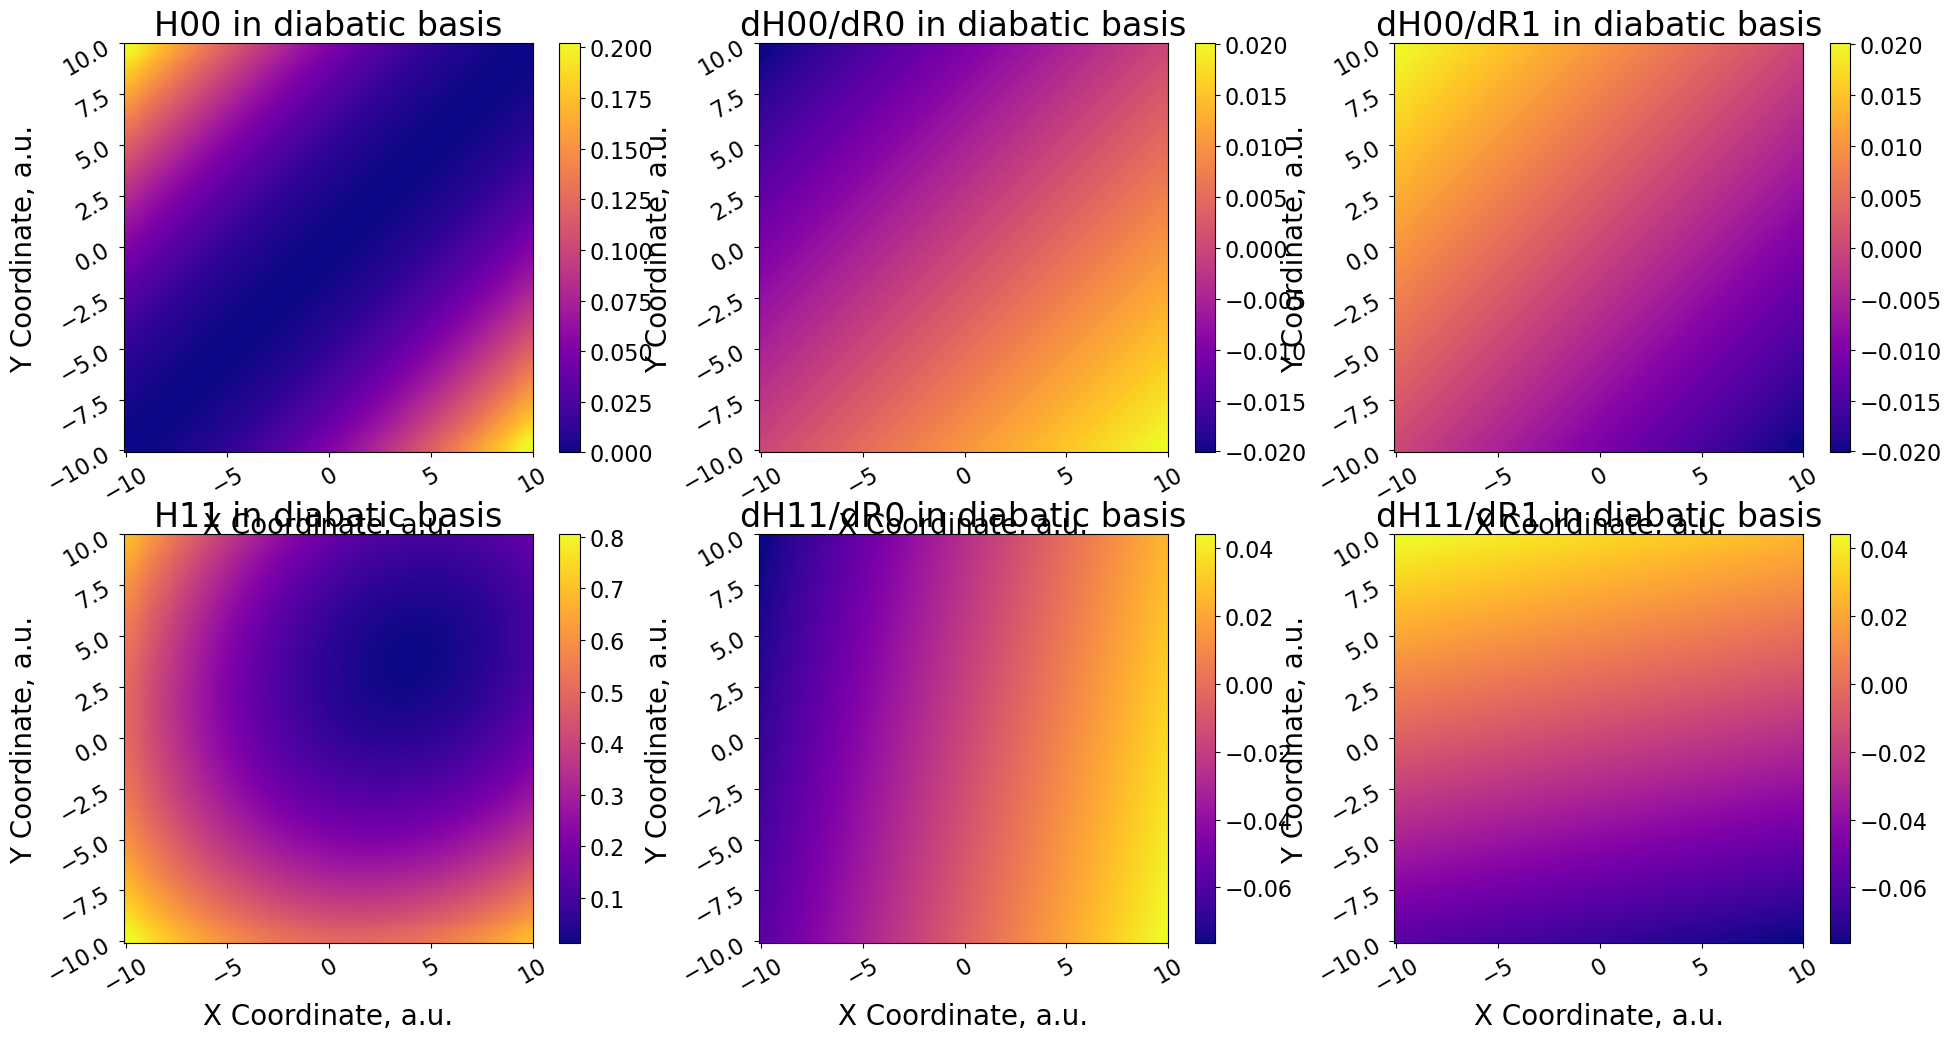

In [5]:
prms = {}

k0, k1 = 0.001, 0.005  # force constants of each diabatic surface
V = 0.001              # diabatic coupling
E0, E1 = 0.0, 0.01     # diabatic shifts
alp0, alp1 = 1.0, 1.0
b = -0.001
x0, x1, x01 = 0.0, 4.0, 2.0
prms["A"] = [  [k0, b, b, k0],   [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],  [k1, b, b, k1]
            ]
prms["B"] = [  [0.0, 0.0],   [0.0, 0.0],
                [0.0,0.0],   [0.0,0.0]
            ]
prms["C"] = [  [E0],   [V],
               [V],    [E1]
            ]
prms["T"] = [  [x0,  x0],   [x01, x01],
               [x01, x01],   [x1, x1]
            ]

prms["a"] = [  [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0],
               [0.0,0.0, 0.0, 0.0],  [0.0, 0.0, 0.0, 0.0]
            ]
prms["b"] = [  [0.0, 0.0],   [0.0, 0.0],
               [0.0, 0.0],   [0.0, 0.0]
            ]
prms["c"] = [  [0.0],   [0.0],
               [0.0],   [0.0]
            ]
prms["t"] = [  [0.0, 0.0],   [0.0, 0.0],
               [0.0, 0.0],   [0.0, 0.0]
            ]

X = list(np.linspace(-10.1, 10.0, 25) )
Y = list(np.linspace(-10.1, 10.0, 25) )

H00, dH00_0, dH00_1 = [], [], []
H11, dH11_0, dH11_1 = [], [], []
full_id = Py2Cpp_int([0, 0])

for i in range(len(X)):
    h00, dh00_0, dh00_1 = [], [], []
    h11, dh11_0, dh11_1 = [], [], []
    
    for j in range(len(Y)):        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = Holstein.Holstein_gen(q, prms, full_id)
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)

        h11.append(obj.ham_dia.get(1,1).real)            
        dh11_0.append(obj.d1ham_dia[0].get(1,1).real)
        dh11_1.append(obj.d1ham_dia[1].get(1,1).real)

    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);
    H11.append(h11); dH11_0.append(dh11_0);  dH11_1.append(dh11_1);
    
    
    
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(2,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(2,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(2,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.subplot(2,3,4)
plt.title('H11 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H11)

plt.subplot(2,3,5)
plt.title('dH11/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH11_0)

plt.subplot(2,3,6)
plt.title('dH11/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH11_1)


plt.show()
plt.close()